### 1. 데이터 로드 및 전처리

In [64]:
import importlib.util

# 라이브러리 목록
libraries = [
    "pandas", "numpy", "matplotlib", "seaborn", "shap", "sklearn", 
    "xgboost", "lightgbm", "catboost", "deap"
]

# 버전 확인 함수
def check_version(lib_name):
    spec = importlib.util.find_spec(lib_name)
    if spec is not None:
        module = __import__(lib_name)
        return f"{lib_name} {module.__version__}"
    else:
        return f"{lib_name} is not installed"

# 결과 출력
for lib in libraries:
    print(check_version(lib))

pandas 2.1.4
numpy 1.23.2
matplotlib 3.8.2
seaborn 0.13.0
shap 0.46.0
sklearn 1.1.0
xgboost 1.6.1
lightgbm 4.5.0
catboost 1.2.2
deap 1.4


In [1]:
import psutil
import os

# 현재 프로세스의 메모리 사용량 (MB 단위)
memory_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2
print(f"현재 메모리 사용량: {memory_usage:.2f} MB")


현재 메모리 사용량: 63.71 MB


In [2]:
import pandas as pd

# 파일 로드
train_data = pd.read_csv('train.csv')

# 데이터의 처음 몇 줄을 확인
train_data.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [3]:
import numpy as np
import pandas as pd

# ATA를 datetime 형식으로 변환
train_data['ATA2'] = pd.to_datetime(train_data['ATA'])

# ATA를 분으로 변환하여 새로운 컬럼 추가
train_data['ATA_minutes'] = train_data['ATA2'].dt.hour * 60 + train_data['ATA2'].dt.minute

In [4]:
import numpy as np

# 수치형 변수만 선택 (범주형 제외)
numeric_data = train_data.select_dtypes(include=[np.number])

# 각 통계 값 계산
min_vals = numeric_data.min()
max_vals = numeric_data.max()
mean_vals = numeric_data.mean()
median_vals = numeric_data.median()
std_vals = numeric_data.std()

# 결과를 하나의 데이터프레임으로 통합
summary_stats = pd.DataFrame({
    'Min': min_vals,
    'Max': max_vals,
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# 통계 결과 출력
summary_stats

,Min,Max,Mean,Median,Standard Deviation
DIST,0.000000,199.980651,19.328187,6.929678,30.930059
BREADTH,10.000000,60.000000,30.550010,30.000000,10.957070
BUILT,0.000000,80.000000,14.747989,13.000000,7.043988
DEADWEIGHT,100.000000,404000.000000,63577.506780,47400.000000,63515.531024
DEPTH,0.000000,30.000000,16.476177,20.000000,6.045930
DRAUGHT,0.000000,20.000000,11.088106,10.000000,4.599298
GT,150.000000,237000.000000,41348.968666,30700.000000,39304.543664
LENGTH,20.000000,400.000000,205.121320,190.000000,75.873891
U_WIND,-25.330000,17.910000,-0.294910,-0.130000,3.366585
V_WIND,-21.450000,29.690000,-0.263849,0.000000,3.736949


- 결측치 확인

In [5]:
# 결측치 확인
missing_values = train_data.isnull().sum()
print("결측치 개수:\n", missing_values)

결측치 개수:
 SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
ATA2                       0
ATA_minutes                0
dtype: int64


In [6]:
# 전체 데이터에서 결측치가 있는 열 비율 확인
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
print("\n열별 결측치 비율(%):\n", missing_percentage)


열별 결측치 비율(%):
 SAMPLE_ID              0.000000
ARI_CO                 0.000000
ARI_PO                 0.000000
SHIP_TYPE_CATEGORY     0.000000
DIST                   0.000000
ATA                    0.000000
ID                     0.000000
BREADTH                0.000255
BUILT                  0.000000
DEADWEIGHT             0.000000
DEPTH                  0.000255
DRAUGHT                0.000255
GT                     0.000000
LENGTH                 0.000255
SHIPMANAGER            0.000000
FLAG                   0.000000
U_WIND                41.763642
V_WIND                41.763642
AIR_TEMPERATURE       42.003985
BN                    41.763642
ATA_LT                 0.000000
PORT_SIZE              0.000000
CI_HOUR                0.000000
ATA2                   0.000000
ATA_minutes            0.000000
dtype: float64


- 결측치 제거

In [7]:
# 결측치 제거 (결측치가 있는 모든 행 제거)
train_data_cleaned = train_data.dropna()

# 결측치 제거 후 데이터 확인
print("\n결측치 제거 후 데이터 크기:", train_data_cleaned.shape)


결측치 제거 후 데이터 크기: (227308, 25)


In [8]:
# 결측치 확인
train_data_cleaned_missing_values = train_data_cleaned.isnull().sum()
print("결측치 개수:\n", train_data_cleaned_missing_values)

결측치 개수:
 SAMPLE_ID             0
ARI_CO                0
ARI_PO                0
SHIP_TYPE_CATEGORY    0
DIST                  0
ATA                   0
ID                    0
BREADTH               0
BUILT                 0
DEADWEIGHT            0
DEPTH                 0
DRAUGHT               0
GT                    0
LENGTH                0
SHIPMANAGER           0
FLAG                  0
U_WIND                0
V_WIND                0
AIR_TEMPERATURE       0
BN                    0
ATA_LT                0
PORT_SIZE             0
CI_HOUR               0
ATA2                  0
ATA_minutes           0
dtype: int64


- 범주형 변수 확인

In [9]:
train_data_cleaned = train_data_cleaned.drop(columns=['ATA_minutes', 'ATA2'])

In [10]:
# train_data_cleaned_missing_values가 DataFrame이 맞는지 확인
print(type(train_data_cleaned_missing_values))  # DataFrame이 아니면 문제가 있음

# 데이터프레임에서 범주형 변수 추출 (train_data를 사용)
categorical_columns = train_data_cleaned.select_dtypes(include=['object', 'category']).columns
print("\n범주형 변수:\n", categorical_columns)

<class 'pandas.core.series.Series'>

범주형 변수:
 Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ATA', 'ID',
       'SHIPMANAGER', 'FLAG'],
      dtype='object')


- 레이블 인코딩(Label Encoding)

In [11]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 객체 생성
label_encoder = LabelEncoder()

# 범주형 변수를 수치형으로 변환
for col in categorical_columns:
    train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])

# 변환된 데이터 확인
print(train_data_cleaned.head())

    SAMPLE_ID  ARI_CO  ARI_PO  SHIP_TYPE_CATEGORY       DIST     ATA     ID  \
3           0       8     100                   2   0.000000   38335  22780   
4           1      17      21                   2  27.037650   39108    860   
5           2       0      90                   0  49.953585   85757  17103   
7           3      19      35                   1   0.000000  172683  12308   
10          4       4      84                   0  18.022495  116774  18525   

    BREADTH  BUILT  DEADWEIGHT  ...  LENGTH  SHIPMANAGER  FLAG  U_WIND  \
3      20.0     18        6910  ...   120.0         3630     4   -3.18   
4      50.0     10      116000  ...   300.0         1610    63   -0.33   
5      40.0      7      183000  ...   290.0         1927    55    6.10   
7      30.0     18       46600  ...   200.0         1044    46    2.82   
10     30.0     11       35000  ...   180.0         2508    72   -2.16   

    V_WIND  AIR_TEMPERATURE        BN  ATA_LT  PORT_SIZE     CI_HOUR  
3    -1.6

- 이상치 정의 및 제거

In [12]:
# IQR을 사용하여 이상치 필터링하는 함수
def filter_outliers(df, column):
    # 1사분위수 (Q1)와 3사분위수 (Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 기준
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 데이터만 필터링
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 수치형 변수에 대해 이상치를 제거
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 변수에 대해 이상치 제거
filtered_data = train_data_cleaned.copy()  # 원본 데이터를 유지하기 위해 복사
for col in numerical_columns:
    filtered_data = filter_outliers(filtered_data, col)

# 필터링된 데이터의 정보 출력
print(filtered_data.info())
print(filtered_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 121402 entries, 3 to 391929
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           121402 non-null  int32  
 1   ARI_CO              121402 non-null  int32  
 2   ARI_PO              121402 non-null  int32  
 3   SHIP_TYPE_CATEGORY  121402 non-null  int32  
 4   DIST                121402 non-null  float64
 5   ATA                 121402 non-null  int32  
 6   ID                  121402 non-null  int32  
 7   BREADTH             121402 non-null  float64
 8   BUILT               121402 non-null  int64  
 9   DEADWEIGHT          121402 non-null  int64  
 10  DEPTH               121402 non-null  float64
 11  DRAUGHT             121402 non-null  float64
 12  GT                  121402 non-null  int64  
 13  LENGTH              121402 non-null  float64
 14  SHIPMANAGER         121402 non-null  int32  
 15  FLAG                121402 non-null  in

In [13]:
# 필터링 전 데이터 크기
print("필터링 전 데이터 크기:", train_data_cleaned.shape)

# 수치형 변수에 대해 이상치를 제거
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 변수에 대해 이상치 제거
filtered_data = train_data_cleaned.copy()  # 원본 데이터를 유지하기 위해 복사
for col in numerical_columns:
    filtered_data = filter_outliers(filtered_data, col)

# 필터링 후 데이터 크기
print("필터링 후 데이터 크기:", filtered_data.shape)

# # 필터링 전후 주요 통계 정보 비교
# print("\n=== 필터링 전 데이터 통계 ===")
# print(train_data_cleaned[numerical_columns].describe())

print("\n=== 필터링 후 데이터 통계 ===")
print(filtered_data[numerical_columns].describe())

# 필터링 전후 각 열의 데이터 차이 확인
print("\n=== 필터링된 데이터에서 제외된 행 개수 ===")
print(train_data_cleaned.shape[0] - filtered_data.shape[0])

필터링 전 데이터 크기: (227308, 23)
필터링 후 데이터 크기: (121402, 23)

=== 필터링 후 데이터 통계 ===
                DIST        BREADTH          BUILT     DEADWEIGHT  \
count  121402.000000  121402.000000  121402.000000  121402.000000   
mean        9.095039      26.999967      14.595106   36772.486120   
std        13.277952       6.964495       6.829359   26728.537199   
min         0.000000      10.000000       0.000000     730.000000   
25%         0.000000      20.000000      10.000000   12500.000000   
50%         0.558449      30.000000      14.000000   32900.000000   
75%        14.128281      30.000000      19.000000   56900.000000   
max        63.930275      40.000000      32.000000  122000.000000   

               DEPTH   DRAUGHT             GT        LENGTH         U_WIND  \
count  121402.000000  121402.0  121402.000000  121402.00000  121402.000000   
mean       15.040032      10.0   24737.362564     178.84277      -0.184989   
std         5.003154       0.0   17365.818785      53.31873       2.

In [14]:
filtered_data[numerical_columns].describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
count,121402.000000,121402.000000,121402.000000,121402.000000,121402.000000,121402.0,121402.000000,121402.00000,121402.000000,121402.000000,121402.000000,121402.000000,121402.000000,121402.000000,121402.000000
mean,9.095039,26.999967,14.595106,36772.486120,15.040032,10.0,24737.362564,178.84277,-0.184989,-0.077490,18.937658,2.500080,11.767953,0.000859,14.689339
std,13.277952,6.964495,6.829359,26728.537199,5.003154,0.0,17365.818785,53.31873,2.773593,3.187008,9.660870,1.170826,6.557339,0.000827,23.859181
min,0.000000,10.000000,0.000000,730.000000,10.000000,10.0,500.000000,50.00000,-7.660000,-8.720000,-10.200000,0.000000,0.000000,0.000005,0.000000
25%,0.000000,20.000000,10.000000,12500.000000,10.000000,10.0,9600.000000,140.00000,-1.900000,-2.110000,12.000000,1.749074,7.000000,0.000182,0.000000
50%,0.558449,30.000000,14.000000,32900.000000,20.000000,10.0,22400.000000,180.00000,-0.020000,0.000000,21.700000,2.517449,12.000000,0.000552,0.507778
75%,14.128281,30.000000,19.000000,56900.000000,20.000000,10.0,36400.000000,220.00000,1.510000,2.000000,26.700000,3.330520,17.000000,0.001614,20.323750
max,63.930275,40.000000,32.000000,122000.000000,30.000000,10.0,81500.000000,320.00000,7.090000,8.430000,47.600000,5.680614,23.000000,0.002615,103.565556


- X, Y 분리

In [15]:
filtered_data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
3,0,8,100,2,0.000000,38335,22780,20.0,18,6910,...,120.0,3630,4,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
7,3,19,35,1,0.000000,172683,12308,30.0,18,46600,...,200.0,1044,46,2.82,0.25,28.6,2.255079,18,0.000990,0.000000
10,4,4,84,0,18.022495,116774,18525,30.0,11,35000,...,180.0,2508,72,-2.16,1.50,25.6,2.146870,10,0.000520,2.721944
13,5,4,73,0,21.887307,95535,16242,40.0,9,70400,...,220.0,1879,46,-4.88,1.55,21.9,3.347518,5,0.000455,7.374722
15,6,4,62,1,0.000000,91604,10171,20.0,17,13600,...,130.0,2472,81,-0.52,4.15,10.5,2.925161,23,0.000595,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391916,227298,4,45,2,0.000000,90601,14769,40.0,11,61600,...,250.0,4077,46,-3.25,-1.83,17.6,2.710105,11,0.001743,0.000000
391917,227299,9,68,1,0.000000,148228,16529,20.0,3,5100,...,100.0,4734,9,-0.26,0.80,16.1,1.004134,3,0.000149,0.000000
391919,227300,4,14,2,59.226456,80252,3612,20.0,23,12600,...,140.0,832,46,-1.98,-3.53,6.8,2.861839,20,0.001614,14.551111
391922,227301,0,0,0,47.267555,118219,22146,40.0,13,91900,...,230.0,5469,25,-2.23,-1.39,17.1,2.145773,1,0.000113,81.266944


In [16]:
# X, Y 분리 (여기서는 'Y'를 타겟 변수로 'best' 컬럼을 가정)
X = filtered_data.drop(columns=['CI_HOUR'])  # 타겟 변수 제외
Y = filtered_data['CI_HOUR']  # 타겟 변수

- MinMaxScaler() 데이터 정규화

In [17]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 변수만 선택 (datetime 타입 제외)
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 수치형 변수에 대해 스케일링 수행
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

# 정규화된 데이터 확인
filtered_data[numerical_columns].head()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
3,0.000000,0.333333,0.56250,0.050961,0.0,0.0,0.060494,0.259259,0.303729,0.414577,0.292388,0.462864,0.565217,0.134672,0.000000
7,0.000000,0.666667,0.56250,0.378247,0.5,0.0,0.361728,0.555556,0.710508,0.523032,0.671280,0.396978,0.782609,0.377319,0.000000
10,0.281909,0.666667,0.34375,0.282593,0.5,0.0,0.271605,0.481481,0.372881,0.595918,0.619377,0.377929,0.434783,0.197390,0.026282
13,0.342362,1.000000,0.28125,0.574503,0.5,0.0,0.667901,0.629630,0.188475,0.598834,0.555363,0.589288,0.217391,0.172713,0.071208
15,0.000000,0.333333,0.53125,0.106127,0.0,0.0,0.106049,0.296296,0.484068,0.750437,0.358131,0.514937,1.000000,0.226047,0.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 변수만 선택
numerical_columns = X.columns

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 수치형 변수에 대해 스케일링 수행
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

# 정규화된 데이터 확인
filtered_data[numerical_columns].head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,GT,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE
3,0.000000,0.333333,0.990099,0.666667,0.000000,0.197408,0.961099,0.333333,0.56250,0.050961,...,0.060494,0.259259,0.579527,0.034483,0.303729,0.414577,0.292388,0.462864,0.565217,0.134672
7,0.000013,0.791667,0.346535,0.333333,0.000000,0.891796,0.519261,0.666667,0.56250,0.378247,...,0.361728,0.555556,0.166560,0.396552,0.710508,0.523032,0.671280,0.396978,0.782609,0.377319
10,0.000018,0.166667,0.831683,0.000000,0.281909,0.602826,0.781570,0.666667,0.34375,0.282593,...,0.271605,0.481481,0.400351,0.620690,0.372881,0.595918,0.619377,0.377929,0.434783,0.197390
13,0.000022,0.166667,0.722772,0.000000,0.342362,0.493051,0.685245,1.000000,0.28125,0.574503,...,0.667901,0.629630,0.299904,0.396552,0.188475,0.598834,0.555363,0.589288,0.217391,0.172713
15,0.000026,0.166667,0.613861,0.333333,0.000000,0.472733,0.429096,0.333333,0.53125,0.106127,...,0.106049,0.296296,0.394602,0.698276,0.484068,0.750437,0.358131,0.514937,1.000000,0.226047


In [19]:
filtered_data

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
3,0.000000,0.333333,0.990099,0.666667,0.000000,0.197408,0.961099,0.333333,0.56250,0.050961,...,0.259259,0.579527,0.034483,0.303729,0.414577,0.292388,0.462864,0.565217,0.134672,0.000000
7,0.000013,0.791667,0.346535,0.333333,0.000000,0.891796,0.519261,0.666667,0.56250,0.378247,...,0.555556,0.166560,0.396552,0.710508,0.523032,0.671280,0.396978,0.782609,0.377319,0.000000
10,0.000018,0.166667,0.831683,0.000000,0.281909,0.602826,0.781570,0.666667,0.34375,0.282593,...,0.481481,0.400351,0.620690,0.372881,0.595918,0.619377,0.377929,0.434783,0.197390,0.026282
13,0.000022,0.166667,0.722772,0.000000,0.342362,0.493051,0.685245,1.000000,0.28125,0.574503,...,0.629630,0.299904,0.396552,0.188475,0.598834,0.555363,0.589288,0.217391,0.172713,0.071208
15,0.000026,0.166667,0.613861,0.333333,0.000000,0.472733,0.429096,0.333333,0.53125,0.106127,...,0.296296,0.394602,0.698276,0.484068,0.750437,0.358131,0.514937,1.000000,0.226047,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391916,0.999974,0.166667,0.445545,0.666667,0.000000,0.467549,0.623096,1.000000,0.34375,0.501938,...,0.740741,0.650910,0.396552,0.298983,0.401749,0.480969,0.477080,0.478261,0.665804,0.000000
391917,0.999978,0.375000,0.673267,0.333333,0.000000,0.765398,0.697355,0.333333,0.09375,0.036035,...,0.185185,0.755829,0.077586,0.501695,0.555102,0.455017,0.176765,0.130435,0.055272,0.000000
391919,0.999982,0.166667,0.138614,0.666667,0.926423,0.414060,0.152356,0.333333,0.71875,0.097881,...,0.333333,0.132705,0.396552,0.385085,0.302624,0.294118,0.503791,0.869565,0.616515,0.140501
391922,0.999987,0.000000,0.000000,0.000000,0.739361,0.610295,0.934349,1.000000,0.40625,0.751794,...,0.666667,0.873203,0.215517,0.368136,0.427405,0.472318,0.377736,0.043478,0.041626,0.784691


### 2. Feature Selection

In [20]:
correlation_matrix = filtered_data.corr()
print(correlation_matrix['CI_HOUR'].sort_values(ascending=False))

CI_HOUR               1.000000
DIST                  0.527794
DEADWEIGHT            0.112178
DEPTH                 0.072632
ATA                   0.047603
V_WIND                0.042166
GT                    0.033672
SHIPMANAGER           0.020007
BREADTH               0.018692
PORT_SIZE             0.016003
BN                    0.011645
AIR_TEMPERATURE       0.006511
ID                    0.002407
ARI_PO                0.002066
ATA_LT                0.000574
SAMPLE_ID             0.000043
U_WIND               -0.008763
LENGTH               -0.015917
FLAG                 -0.018321
BUILT                -0.020367
ARI_CO               -0.049865
SHIP_TYPE_CATEGORY   -0.159816
DRAUGHT                    NaN
Name: CI_HOUR, dtype: float64


- SHAP

1) XGBoost


특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   14.035408
3   SHIP_TYPE_CATEGORY    2.818949
5                  ATA    1.143533
1               ARI_CO    0.882581
9           DEADWEIGHT    0.849635
21           PORT_SIZE    0.783549
2               ARI_PO    0.728045
12                  GT    0.434727
19                  BN    0.379967
20              ATA_LT    0.368567
15                FLAG    0.363641
13              LENGTH    0.349745
18     AIR_TEMPERATURE    0.313204
16              U_WIND    0.280085
14         SHIPMANAGER    0.275738
6                   ID    0.217237
17              V_WIND    0.208770
0            SAMPLE_ID    0.201058
8                BUILT    0.147014
10               DEPTH    0.057576
7              BREADTH    0.038559
11             DRAUGHT    0.000000


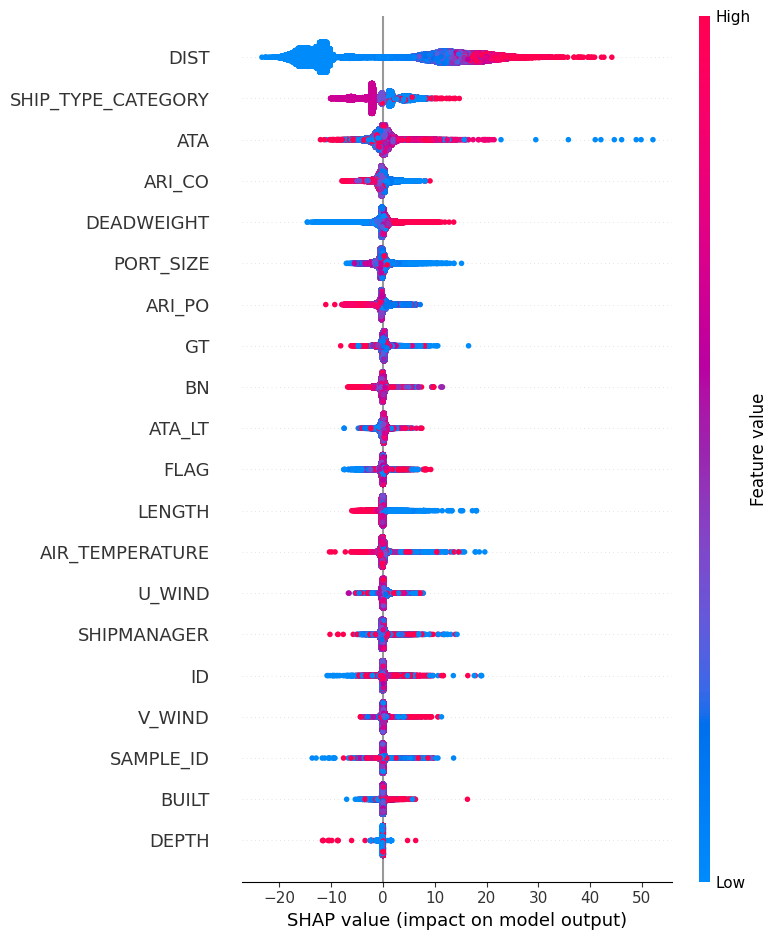

In [21]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np  # NumPy 라이브러리 import 추가
import matplotlib.pyplot as plt

# XGBoost 모델 생성
model = xgb.XGBRegressor()  # 회귀 문제인 경우 XGBRegressor, 분류 문제는 XGBClassifier 사용
model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
explainer = shap.Explainer(model)
shap_values = explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
plt.figure(figsize=(10, 6))  # 그림 크기 설정
shap.summary_plot(shap_values, filtered_data[numerical_columns], show=False)
# 현재 플롯을 저장
plt.savefig('shap_values_XGBR.tiff', format='tiff', dpi=300)

# SHAP 값으로 특징 중요성 확인
feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(shap_values.values).mean(axis=0)})
feature_importance = feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\n특징 중요성 (SHAP 값 기준):")
print(feature_importance)

In [22]:
mean_shap_value = feature_importance['SHAP Value'].mean()
selected_features = feature_importance[feature_importance['SHAP Value'] > mean_shap_value]
print(selected_features)

              Feature  SHAP Value
4                DIST   14.035408
3  SHIP_TYPE_CATEGORY    2.818949
5                 ATA    1.143533


In [23]:
# 상위 5개 특징 선택
xgb_top_n_features = feature_importance.head(10)
print(xgb_top_n_features)

               Feature  SHAP Value
4                 DIST   14.035408
3   SHIP_TYPE_CATEGORY    2.818949
5                  ATA    1.143533
1               ARI_CO    0.882581
9           DEADWEIGHT    0.849635
21           PORT_SIZE    0.783549
2               ARI_PO    0.728045
12                  GT    0.434727
19                  BN    0.379967
20              ATA_LT    0.368567


2. lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 121402, number of used features: 21
[LightGBM] [Info] Start training from score 14.689339

LightGBM 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   14.122121
3   SHIP_TYPE_CATEGORY    2.924151
1               ARI_CO    0.849822
5                  ATA    0.789727
21           PORT_SIZE    0.580514
9           DEADWEIGHT    0.553923
2               ARI_PO    0.541431
15                FLAG    0.267943
20              ATA_LT    0.261252
12                  GT    0.200225
18     AIR_TEMPERATURE    0.171168
19                  BN    0.129854
13              LENGTH    0.121363
14         SHIPMANAGER    0.105896
8                BUILT    0.084344
6                   ID    0.069922
17              V_WIND    0.050

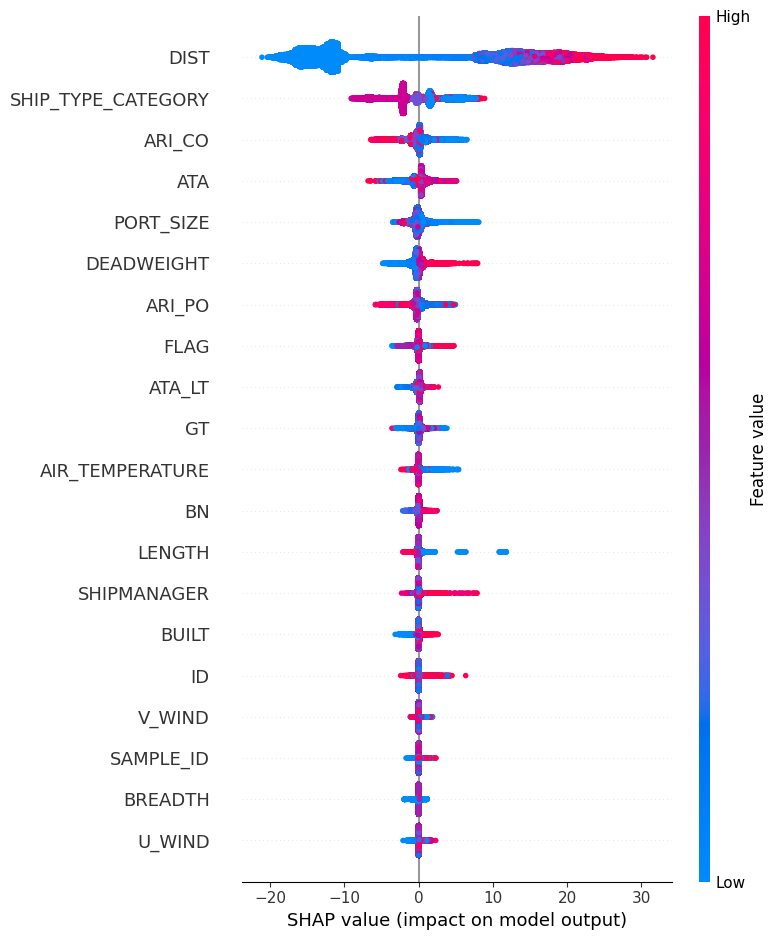

In [23]:
import lightgbm as lgb

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
lgb_explainer = shap.Explainer(lgb_model)
lgb_shap_values = lgb_explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
plt.figure(figsize=(10, 6))
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns], show=False)
plt.savefig('shap_values_LGBR.tiff', format='tiff', dpi=300)

# SHAP 값으로 특징 중요성 확인
lgb_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(lgb_shap_values.values).mean(axis=0)})
lgb_feature_importance = lgb_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nLightGBM 특징 중요성 (SHAP 값 기준):")
print(lgb_feature_importance)

In [24]:
mean_shap_value = lgb_feature_importance['SHAP Value'].mean()
selected_features = lgb_feature_importance[lgb_feature_importance['SHAP Value'] > mean_shap_value]
print(selected_features)

              Feature  SHAP Value
4                DIST   14.122121
3  SHIP_TYPE_CATEGORY    2.924151


In [25]:
# 상위 10개 특징 선택
top_n_features = lgb_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST   14.122121
3   SHIP_TYPE_CATEGORY    2.924151
1               ARI_CO    0.849822
5                  ATA    0.789727
21           PORT_SIZE    0.580514
9           DEADWEIGHT    0.553923
2               ARI_PO    0.541431
15                FLAG    0.267943
20              ATA_LT    0.261252
12                  GT    0.200225


3. Catboost regressor

In [26]:
from catboost import CatBoostRegressor

# CatBoost 모델 생성
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산
cat_explainer = shap.Explainer(cat_model)
cat_shap_values = cat_explainer(filtered_data[numerical_columns])

# SHAP 값 시각화
plt.figure(figsize=(10, 6))
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns], show=False)
plt.savefig('shap_values_CBR.tiff', format='tiff', dpi=300)
plt.close()

# SHAP 값으로 특징 중요성 확인
cat_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(cat_shap_values.values).mean(axis=0)})
cat_feature_importance = cat_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nCatBoost 특징 중요성 (SHAP 값 기준):")
print(cat_feature_importance)


CatBoost 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST   13.630610
3   SHIP_TYPE_CATEGORY    3.202237
1               ARI_CO    0.980786
5                  ATA    0.932612
2               ARI_PO    0.691106
21           PORT_SIZE    0.636735
9           DEADWEIGHT    0.499338
13              LENGTH    0.491216
15                FLAG    0.411069
20              ATA_LT    0.396218
12                  GT    0.386519
18     AIR_TEMPERATURE    0.301805
17              V_WIND    0.278662
19                  BN    0.273184
14         SHIPMANAGER    0.221239
10               DEPTH    0.204120
6                   ID    0.186106
8                BUILT    0.173374
16              U_WIND    0.167524
0            SAMPLE_ID    0.157542
7              BREADTH    0.132234
11             DRAUGHT    0.000000


In [27]:
# 상위 5개 특징 선택
top_n_features = cat_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST   13.630610
3   SHIP_TYPE_CATEGORY    3.202237
1               ARI_CO    0.980786
5                  ATA    0.932612
2               ARI_PO    0.691106
21           PORT_SIZE    0.636735
9           DEADWEIGHT    0.499338
13              LENGTH    0.491216
15                FLAG    0.411069
20              ATA_LT    0.396218


4. linear regression


Linear Regression 특징 중요성 (SHAP 값 기준):
               Feature  SHAP Value
4                 DIST    8.608354
9           DEADWEIGHT    6.722051
13              LENGTH    4.903065
3   SHIP_TYPE_CATEGORY    1.274935
12                  GT    1.219002
5                  ATA    0.747156
1               ARI_CO    0.743445
21           PORT_SIZE    0.668120
2               ARI_PO    0.422036
7              BREADTH    0.325591
15                FLAG    0.263670
8                BUILT    0.261119
14         SHIPMANAGER    0.254153
19                  BN    0.178567
10               DEPTH    0.168413
18     AIR_TEMPERATURE    0.158228
20              ATA_LT    0.128301
16              U_WIND    0.125789
17              V_WIND    0.087615
0            SAMPLE_ID    0.023956
6                   ID    0.013859
11             DRAUGHT    0.000000


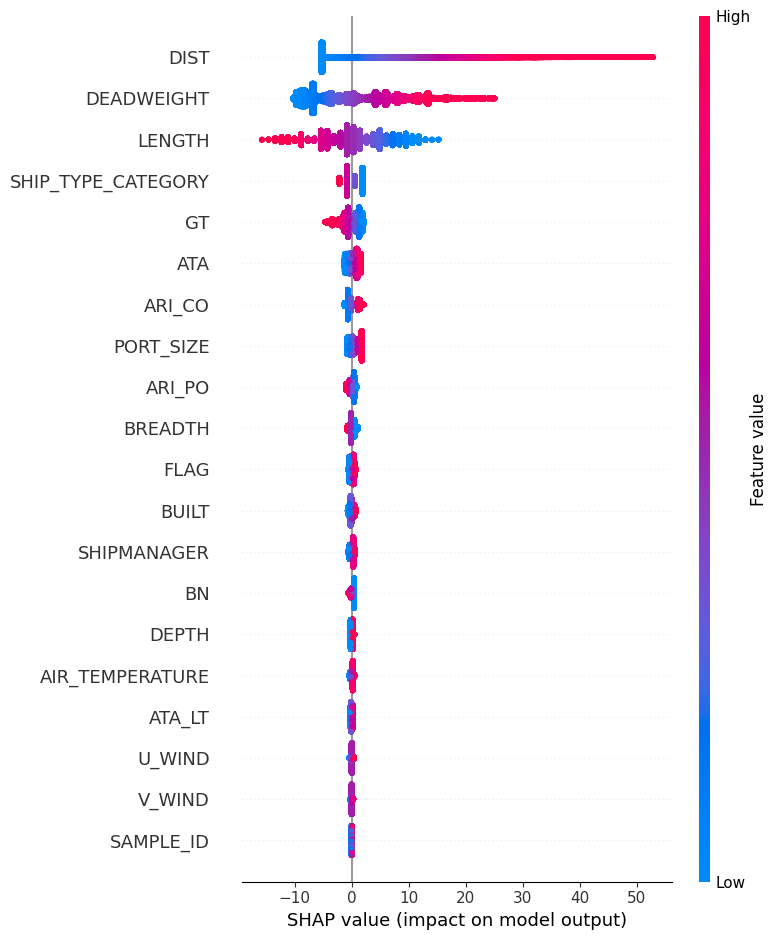

In [28]:
from sklearn.linear_model import LinearRegression
import shap

# Linear Regression 모델 생성
lin_reg_model = LinearRegression()
lin_reg_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산 (LinearExplainer 사용)
lin_reg_explainer = shap.LinearExplainer(lin_reg_model, filtered_data[numerical_columns])
lin_reg_shap_values = lin_reg_explainer.shap_values(filtered_data[numerical_columns])

# SHAP 값 시각화
plt.figure(figsize=(10, 6))
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns],show=False)
plt.savefig('shap_values_LR.tiff', format='tiff', dpi=300)

# SHAP 값으로 특징 중요성 확인
lin_reg_feature_importance = pd.DataFrame({'Feature': filtered_data[numerical_columns].columns, 'SHAP Value': np.abs(lin_reg_shap_values).mean(axis=0)})
lin_reg_feature_importance = lin_reg_feature_importance.sort_values(by='SHAP Value', ascending=False)

print("\nLinear Regression 특징 중요성 (SHAP 값 기준):")
print(lin_reg_feature_importance)

In [29]:
# 상위 10개 특징 선택
top_n_features = lin_reg_feature_importance.head(10)
print(top_n_features)

               Feature  SHAP Value
4                 DIST    8.608354
9           DEADWEIGHT    6.722051
13              LENGTH    4.903065
3   SHIP_TYPE_CATEGORY    1.274935
12                  GT    1.219002
5                  ATA    0.747156
1               ARI_CO    0.743445
21           PORT_SIZE    0.668120
2               ARI_PO    0.422036
7              BREADTH    0.325591


In [24]:
# 폰트 크기 설정
plt.rc('font', size=10)         # 기본 폰트 크기
plt.rc('axes', titlesize=15)     # 제목 폰트 크기
plt.rc('axes', labelsize=10)     # 축 제목 폰트 크기
plt.rc('xtick', labelsize=10)    # x축 값 폰트 크기
plt.rc('ytick', labelsize=10)    # y축 값 폰트 크기
plt.rc('legend', fontsize=10)    # 범례 폰트 크기
plt.rc('figure', titlesize=10)   # Figure 제목 폰트 크기

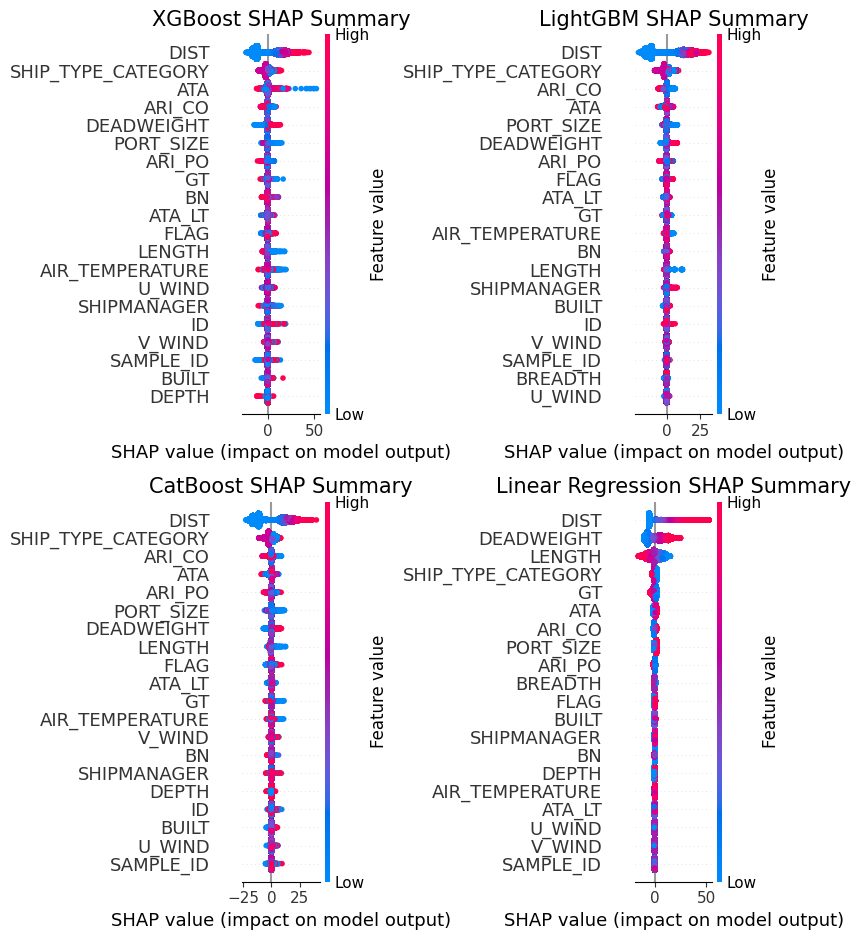

In [31]:
import matplotlib.pyplot as plt

# 서브플롯 생성 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(40, 12))

# XGBoost SHAP Summary Plot
plt.sca(axes[0, 0])  # 첫 번째 서브플롯 활성화
shap.summary_plot(shap_values, filtered_data[numerical_columns], show=False)
axes[0, 0].set_title("XGBoost SHAP Summary")

# LightGBM SHAP Summary Plot
plt.sca(axes[0, 1])  # 두 번째 서브플롯 활성화
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns], show=False)
axes[0, 1].set_title("LightGBM SHAP Summary")

# CatBoost SHAP Summary Plot
plt.sca(axes[1, 0])  # 세 번째 서브플롯 활성화
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 0].set_title("CatBoost SHAP Summary")

# Linear Regression SHAP Summary Plot
plt.sca(axes[1, 1])  # 네 번째 서브플롯 활성화
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 1].set_title("Linear Regression SHAP Summary")

# 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig('combined_shap_summary.tiff', format='tiff', dpi=300)
plt.show()

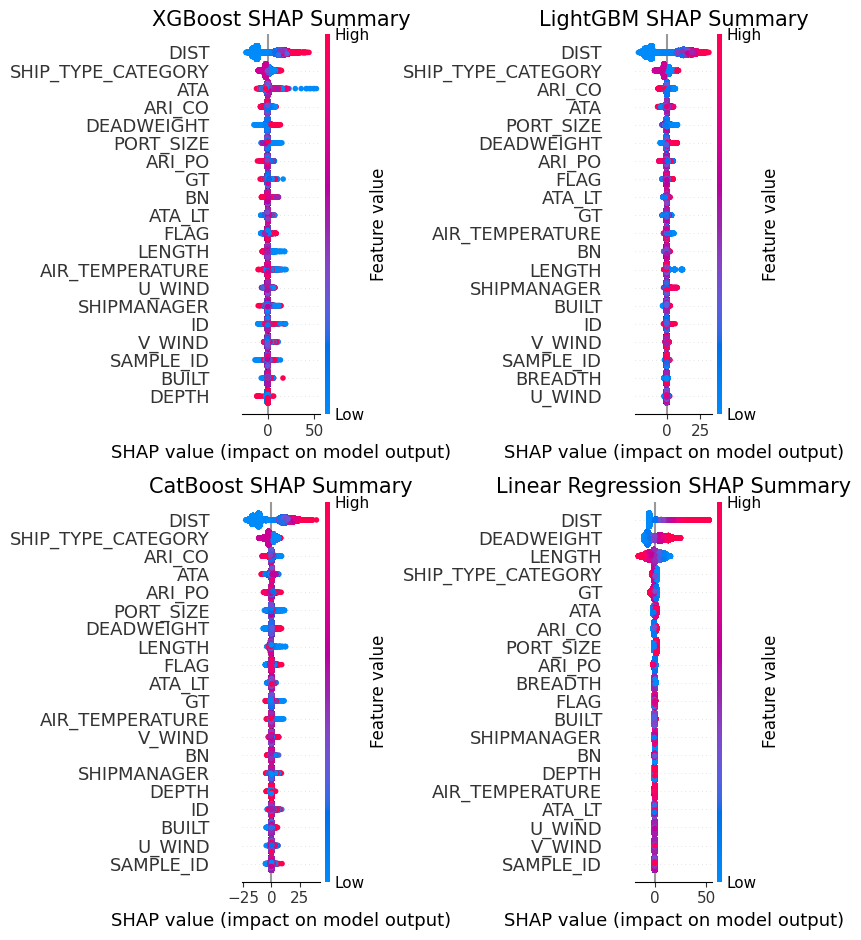

In [33]:
import matplotlib.pyplot as plt
import shap

# 가로 길이를 확장한 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(24, 16))  # 가로 크기를 더 넓게 설정

# XGBoost SHAP Summary Plot
plt.sca(axes[0, 0])  # 첫 번째 서브플롯으로 설정
shap.summary_plot(shap_values, filtered_data[numerical_columns], show=False)
axes[0, 0].set_title("XGBoost SHAP Summary")

# LightGBM SHAP Summary Plot
plt.sca(axes[0, 1])  # 두 번째 서브플롯으로 설정
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns], show=False)
axes[0, 1].set_title("LightGBM SHAP Summary")

# CatBoost SHAP Summary Plot
plt.sca(axes[1, 0])  # 세 번째 서브플롯으로 설정
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 0].set_title("CatBoost SHAP Summary")

# Linear Regression SHAP Summary Plot
plt.sca(axes[1, 1])  # 네 번째 서브플롯으로 설정
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 1].set_title("Linear Regression SHAP Summary")

# 전체 플롯 간 간격 조정
plt.tight_layout()
plt.savefig('combined_shap_summary.png', format='png', dpi=300)
plt.show()

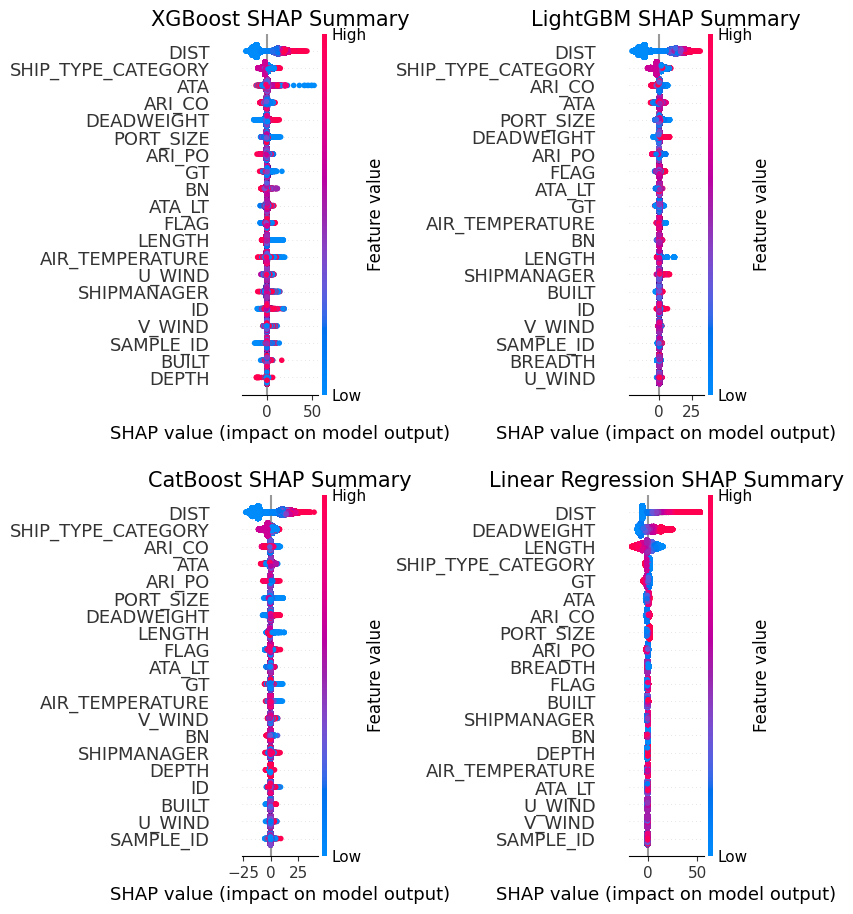

In [34]:
import matplotlib.pyplot as plt
import shap

# 서브플롯 생성 (가로 비율을 더 크게 설정)
fig, axes = plt.subplots(2, 2, figsize=(28, 16))  # 가로 길이를 28로 설정

# XGBoost SHAP Summary Plot
plt.sca(axes[0, 0])  # 첫 번째 서브플롯으로 설정
shap.summary_plot(shap_values, filtered_data[numerical_columns], show=False)
axes[0, 0].set_title("XGBoost SHAP Summary")

# LightGBM SHAP Summary Plot
plt.sca(axes[0, 1])  # 두 번째 서브플롯으로 설정
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns], show=False)
axes[0, 1].set_title("LightGBM SHAP Summary")

# CatBoost SHAP Summary Plot
plt.sca(axes[1, 0])  # 세 번째 서브플롯으로 설정
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 0].set_title("CatBoost SHAP Summary")

# Linear Regression SHAP Summary Plot
plt.sca(axes[1, 1])  # 네 번째 서브플롯으로 설정
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns], show=False)
axes[1, 1].set_title("Linear Regression SHAP Summary")

# 서브플롯 간의 간격 조정
plt.subplots_adjust(wspace=0.4, hspace=0.3)  # 가로/세로 간격 조정
plt.tight_layout(pad=2.0)  # 전체 레이아웃 여백 최소화

# 저장 및 출력
plt.savefig('combined_shap_summary2.tiff', format='tiff', dpi=300)
plt.show()

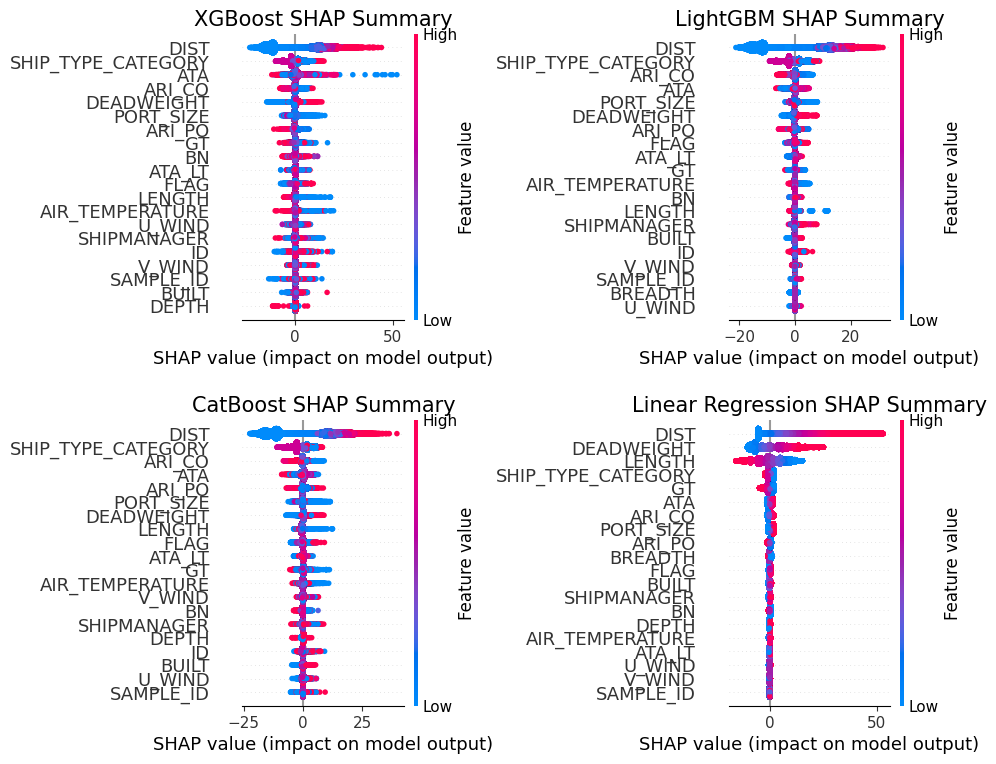

In [36]:
import matplotlib.pyplot as plt
import shap

# 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(28, 16))  # 전체 레이아웃 크기 조정

# XGBoost SHAP Summary Plot
plt.sca(axes[0, 0])  # 첫 번째 서브플롯으로 설정
shap.summary_plot(shap_values, filtered_data[numerical_columns], show=False)
fig = plt.gcf()  # 현재 그래프 가져오기
fig.set_size_inches(10, 8)  # SHAP 그래프 자체 크기 조정
axes[0, 0].set_title("XGBoost SHAP Summary")

# LightGBM SHAP Summary Plot
plt.sca(axes[0, 1])
shap.summary_plot(lgb_shap_values, filtered_data[numerical_columns], show=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
axes[0, 1].set_title("LightGBM SHAP Summary")

# CatBoost SHAP Summary Plot
plt.sca(axes[1, 0])
shap.summary_plot(cat_shap_values, filtered_data[numerical_columns], show=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
axes[1, 0].set_title("CatBoost SHAP Summary")

# Linear Regression SHAP Summary Plot
plt.sca(axes[1, 1])
shap.summary_plot(lin_reg_shap_values, filtered_data[numerical_columns], show=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
axes[1, 1].set_title("Linear Regression SHAP Summary")

# 서브플롯 간의 간격 조정
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.tight_layout(pad=2.0)

# 저장 및 출력
plt.savefig('improved_shap_summary.png', format='png', dpi=300)
plt.show()

5. Random Forest

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산 (TreeExplainer 사용)
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(filtered_data[numerical_columns])

# 회귀 모델인 경우, shap_values는 하나의 배열로 반환되므로 직접 사용
# SHAP 값 시각화
plt.figure(figsize=(10, 6))
shap.summary_plot(rf_shap_values, filtered_data[numerical_columns],show = False)
plt.savefig('shap_values_RFR.tiff', format='tiff', dpi=300)

# SHAP 값으로 특징 중요성 확인
rf_feature_importance = pd.DataFrame({
    'Feature': filtered_data[numerical_columns].columns,
    'SHAP Value': np.abs(rf_shap_values).mean(axis=0)  # 절대값의 평균으로 중요도 계산
})
rf_feature_importance = rf_feature_importance.sort_values(by='SHAP Value', ascending=False)

# 결과 출력
print("\nRandom Forest 특징 중요성 (SHAP 값 기준):")
print(rf_feature_importance)

6) GBR

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Gradient Boosting Regressor 모델 생성 및 학습
gbr_model = GradientBoostingRegressor()
gbr_model.fit(filtered_data[numerical_columns], Y)

# SHAP 값 계산 (TreeExplainer 사용)
gbr_explainer = shap.TreeExplainer(gbr_model)
gbr_shap_values = gbr_explainer.shap_values(filtered_data[numerical_columns])

# SHAP 값 시각화 및 저장
plt.figure(figsize=(10, 6))
shap.summary_plot(gbr_shap_values, filtered_data[numerical_columns], show=False)
plt.savefig('shap_values_GBR.tiff', format='tiff', dpi=300)
plt.close()  # 메모리 관리

# SHAP 값으로 특징 중요성 확인
gbr_feature_importance = pd.DataFrame({
    'Feature': filtered_data[numerical_columns].columns,
    'SHAP Value': np.abs(gbr_shap_values).mean(axis=0)  # 절대값의 평균으로 중요도 계산
})
gbr_feature_importance = gbr_feature_importance.sort_values(by='SHAP Value', ascending=False)

# 결과 출력
print("\nGradient Boosting Regressor 특징 중요성 (SHAP 값 기준):")
print(gbr_feature_importance)

### 3. 모델 학습 및 검증

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

In [25]:
top_n_features_list = xgb_top_n_features['Feature'][:7].tolist()
filtered_data[top_n_features_list]

,DIST,SHIP_TYPE_CATEGORY,ATA,ARI_CO,DEADWEIGHT,PORT_SIZE,ARI_PO
3,0.000000,0.666667,0.197408,0.333333,0.050961,0.134672,0.990099
7,0.000000,0.333333,0.891796,0.791667,0.378247,0.377319,0.346535
10,0.281909,0.000000,0.602826,0.166667,0.282593,0.197390,0.831683
13,0.342362,0.000000,0.493051,0.166667,0.574503,0.172713,0.722772
15,0.000000,0.333333,0.472733,0.166667,0.106127,0.226047,0.613861
...,...,...,...,...,...,...,...
391916,0.000000,0.666667,0.467549,0.166667,0.501938,0.665804,0.445545
391917,0.000000,0.333333,0.765398,0.375000,0.036035,0.055272,0.673267
391919,0.926423,0.666667,0.414060,0.166667,0.097881,0.616515,0.138614
391922,0.739361,0.000000,0.610295,0.000000,0.751794,0.041626,0.000000


In [26]:
# X, Y 분리
X = filtered_data[top_n_features_list]  # 타겟 변수를 제외한 특징
Y = Y  # 타겟 변수

# 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# 기본 모델 정의
base_models = [
    ('RFR', RandomForestRegressor()),
    ('XGBR', xgb.XGBRegressor()),
    ('LGBR', lgb.LGBMRegressor()),
    ('CBR', CatBoostRegressor(verbose=0))
]

# 메타 모델 정의
meta_model = GradientBoostingRegressor()

In [ ]:
import torch
import torch.nn as nn
import numpy as np


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from memory_profiler import memory_usage
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM 모델 정의
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# 모델 리스트 생성
models = {
    "LR": LinearRegression(),
    "Ridge": Ridge(),
    "RFR": RandomForestRegressor(),
    "XGBR": xgb.XGBRegressor(),
    "LGBR": lgb.LGBMRegressor(),
    "CBR": CatBoostRegressor(verbose=0),
    "GBR": GradientBoostingRegressor(),
    "MLP": MLPRegressor(),
}

In [28]:
models = {
    "LR": LinearRegression(),
    "XGBR": xgb.XGBRegressor(),
}

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from memory_profiler import memory_usage

# LSTM 모델 정의
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# 성능 평가 및 학습 비용 저장 리스트 초기화
results = []
rmse_list, mae_list, r2_list = [], [], []
training_time_list, memory_usage_list = [], []
test_rmse_list, test_mae_list, test_r2_list = [], [], []  # test score 추가

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 리스트 정의 (LSTM 포함)
models = {
    "LR": LinearRegression(),
    "Ridge": Ridge(),
    "RFR": RandomForestRegressor(),
    "XGBR": xgb.XGBRegressor(),
    "LGBR": lgb.LGBMRegressor(force_col_wise = True),
    "CBR": CatBoostRegressor(verbose=0),
    "GBR": GradientBoostingRegressor(),
    "MLP": MLPRegressor(),
#    "LSTM": LSTMRegressor(input_size=X.shape[1])  # LSTM 추가
}

In [ ]:
# 각 모델 성능 평가 및 학습 비용 측정
for model_name, model in models.items():
    start_time = time.time()  # 학습 시작 시간 측정

    # 메모리 사용량 측정하면서 교차 검증 실행
    mem_usage = memory_usage((cross_val_score, (model, X, Y), {'cv': kf, 'scoring': 'neg_root_mean_squared_error'}))

    end_time = time.time()  # 학습 종료 시간 측정

    # 학습 시간 및 최대 메모리 사용량 계산
    training_time = end_time - start_time
    max_memory = max(mem_usage)  # 최대 메모리 사용량

    if model_name == "LSTM":
        fold_rmse_list, fold_mae_list, fold_r2_list = [], [], []

        # KFold 교차 검증 수행
        for train_idx, val_idx in kf.split(X):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            Y_train_fold, Y_val_fold = Y[train_idx], Y[val_idx]

            # LSTM 입력 데이터 형태 맞추기
            X_train_fold = np.expand_dims(X_train_fold, axis=1)  # (samples, 1, features)
            X_val_fold = np.expand_dims(X_val_fold, axis=1)

            # LSTM 모델 정의 및 학습
            lstm_model = LSTMRegressor(input_size=X_train_fold.shape[2])
            lstm_model.train()

            # 데이터를 torch.Tensor 형태로 변환
            X_train_tensor = torch.Tensor(X_train_fold)
            y_train_tensor = torch.Tensor(Y_train_fold)
            X_val_tensor = torch.Tensor(X_val_fold)
            y_val_tensor = torch.Tensor(Y_val_fold)

            optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
            criterion = nn.MSELoss()

            for epoch in range(100):  # 100 epochs 설정
                optimizer.zero_grad()
                outputs = lstm_model(X_train_tensor)
                loss = criterion(outputs, y_train_tensor.view(-1, 1))
                loss.backward()
                optimizer.step()

            # Validation 데이터로 예측
            with torch.no_grad():
                lstm_model.eval()
                predictions = lstm_model(X_val_tensor)
                fold_rmse_list.append(np.sqrt(mean_squared_error(Y_val_fold, predictions.numpy())))
                fold_mae_list.append(mean_absolute_error(Y_val_fold, predictions.numpy()))
                fold_r2_list.append(r2_score(Y_val_fold, predictions.numpy()))

        # fold별 성능 평균 계산
        test_rmse_mean = np.mean(fold_rmse_list)
        test_rmse_std = np.std(fold_rmse_list)
        test_mae_mean = np.mean(fold_mae_list)
        test_mae_std = np.std(fold_mae_list)
        test_r2_mean = np.mean(fold_r2_list)
        test_r2_std = np.std(fold_r2_list)
    else:
        # 일반 모델들에 대해서는 cross_val_score 사용
        rmse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_root_mean_squared_error')
        mae_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_error')
        r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

        # 테스트 성능 추가
        test_rmse_mean = -rmse_scores.mean()
        test_rmse_std = rmse_scores.std()
        test_mae_mean = -mae_scores.mean()
        test_mae_std = mae_scores.std()
        test_r2_mean = r2_scores.mean()
        test_r2_std = r2_scores.std()

    # 결과 저장
    results.append({
        'Model': model_name,
        'RMSE Mean': -rmse_scores.mean() if model_name != "LSTM" else test_rmse_mean,
        'RMSE Std': rmse_scores.std() if model_name != "LSTM" else test_rmse_std,
        'MAE Mean': -mae_scores.mean() if model_name != "LSTM" else test_mae_mean,
        'MAE Std': mae_scores.std() if model_name != "LSTM" else test_mae_std,
        'R2 Mean': r2_scores.mean() if model_name != "LSTM" else test_r2_mean,
        'R2 Std': r2_scores.std() if model_name != "LSTM" else test_r2_std,
        'Test RMSE Mean': test_rmse_mean,
        'Test RMSE Std': test_rmse_std,
        'Test MAE Mean': test_mae_mean,
        'Test MAE Std': test_mae_std,
        'Test R2 Mean': test_r2_mean,
        'Test R2 Std': test_r2_std,
        'Training Time (sec)': training_time,
        'Max Memory Usage (MB)': max_memory
    })

    # 시각화용 데이터 저장
    rmse_list.append(-rmse_scores if model_name != "LSTM" else fold_rmse_list)
    mae_list.append(-mae_scores if model_name != "LSTM" else fold_mae_list)
    r2_list.append(r2_scores if model_name != "LSTM" else fold_r2_list)
    training_time_list.append(training_time)
    memory_usage_list.append(max_memory)
    test_rmse_list.append(test_rmse_mean)
    test_mae_list.append(test_mae_mean)
    test_r2_list.append(test_r2_mean)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

In [ ]:
# 성능 평가 및 학습 비용 저장 리스트 초기화
results = []
rmse_list, mae_list, r2_list = [], [], []
training_time_list, memory_usage_list = [], []
test_rmse_list, test_mae_list, test_r2_list = [], [], []  # test score 추가

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 모델 성능 평가 및 학습 비용 측정
for model_name, model in models.items():
    start_time = time.time()  # 학습 시작 시간 측정

    # 메모리 사용량 측정하면서 교차 검증 실행
    mem_usage = memory_usage((cross_val_score, (model, X, Y), {'cv': kf, 'scoring': 'neg_root_mean_squared_error'}))

    end_time = time.time()  # 학습 종료 시간 측정

    # 학습 시간 및 최대 메모리 사용량 계산
    training_time = end_time - start_time
    max_memory = max(mem_usage)  # 최대 메모리 사용량

    # 5-fold 교차검증 성능 평가
    rmse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_root_mean_squared_error')
    mae_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

    # Test 성능 추가 (교차 검증 후 직접 예측)
    test_rmse_fold = []
    test_mae_fold = []
    test_r2_fold = []
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        Y_train_fold, Y_val_fold = Y[train_idx], Y[val_idx]
        
        model.fit(X_train_fold, Y_train_fold)
        y_pred = model.predict(X_val_fold)
        
        test_rmse_fold.append(np.sqrt(mean_squared_error(Y_val_fold, y_pred)))
        test_mae_fold.append(mean_absolute_error(Y_val_fold, y_pred))
        test_r2_fold.append(r2_score(Y_val_fold, y_pred))
    
    # 테스트 성능의 평균과 표준편차 계산
    test_rmse_mean = np.mean(test_rmse_fold)
    test_rmse_std = np.std(test_rmse_fold)
    test_mae_mean = np.mean(test_mae_fold)
    test_mae_std = np.std(test_mae_fold)
    test_r2_mean = np.mean(test_r2_fold)
    test_r2_std = np.std(test_r2_fold)

    # 결과 저장
    results.append({
        'Model': model_name,
        'RMSE Mean': -rmse_scores.mean(),
        'RMSE Std': rmse_scores.std(),
        'MAE Mean': -mae_scores.mean(),
        'MAE Std': mae_scores.std(),
        'R2 Mean': r2_scores.mean(),
        'R2 Std': r2_scores.std(),
        'Test RMSE Mean': test_rmse_mean,
        'Test RMSE Std': test_rmse_std,
        'Test MAE Mean': test_mae_mean,
        'Test MAE Std': test_mae_std,
        'Test R2 Mean': test_r2_mean,
        'Test R2 Std': test_r2_std,
        'Training Time (sec)': training_time,
        'Max Memory Usage (MB)': max_memory
    })

    # 시각화용 데이터 저장
    rmse_list.append(-rmse_scores)
    mae_list.append(-mae_scores)
    r2_list.append(r2_scores)
    training_time_list.append(training_time)
    memory_usage_list.append(max_memory)
    test_rmse_list.append(test_rmse_mean)
    test_mae_list.append(test_mae_mean)
    test_r2_list.append(test_r2_mean)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

TypeError: 'float' object is not callable

아래는 실행잘됨! 위가 이상하면 아래 실행! 위가 정상 작동하면 아래 삭제 바람람

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage
from sklearn.model_selection import cross_val_score, KFold

# 성능 평가 및 학습 비용 저장 리스트 초기화
results = []
rmse_list, mae_list, r2_list = [], [], []
training_time_list, memory_usage_list = [], []

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 모델 성능 평가 및 학습 비용 측정
for model_name, model in models.items():
    start_time = time.time()  # 학습 시작 시간 측정
    
    # 메모리 사용량 측정하면서 교차 검증 실행
    mem_usage = memory_usage((cross_val_score, (model, X, Y), {'cv': kf, 'scoring': 'neg_root_mean_squared_error'}))
    
    end_time = time.time()  # 학습 종료 시간 측정
    
    # 학습 시간 및 최대 메모리 사용량 계산
    training_time = end_time - start_time
    max_memory = max(mem_usage)  # 최대 메모리 사용량
    
    # 5-fold 교차검증 성능 평가
    rmse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_root_mean_squared_error')
    mae_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

    # 결과 저장
    results.append({
        'Model': model_name,
        'RMSE Mean': -rmse_scores.mean(),
        'RMSE Std': rmse_scores.std(),
        'MAE Mean': -mae_scores.mean(),
        'MAE Std': mae_scores.std(),
        'R2 Mean': r2_scores.mean(),
        'R2 Std': r2_scores.std(),
        'Training Time (sec)': training_time,
        'Max Memory Usage (MB)': max_memory
    })

    # 시각화용 데이터 저장
    rmse_list.append(-rmse_scores)
    mae_list.append(-mae_scores)
    r2_list.append(r2_scores)
    training_time_list.append(training_time)
    memory_usage_list.append(max_memory)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

ValueError: 
All the 5 fits failed.
It is is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\tree\_classes.py", line 458, in fit
    builder.build(self.tree_, X, y, sample_weight)
  File "sklearn\tree\_tree.pyx", line 148, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 248, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 763, in sklearn.tree._tree.Tree._add_node
  File "sklearn\tree\_tree.pyx", line 734, in sklearn.tree._tree.Tree._resize_c
  File "sklearn\tree\_utils.pyx", line 37, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 3670016 bytes

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\tree\_classes.py", line 458, in fit
    builder.build(self.tree_, X, y, sample_weight)
  File "sklearn\tree\_tree.pyx", line 148, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 248, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\tree\_tree.pyx", line 763, in sklearn.tree._tree.Tree._add_node
  File "sklearn\tree\_tree.pyx", line 734, in sklearn.tree._tree.Tree._resize_c
  File "sklearn\tree\_utils.pyx", line 37, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 1835008 bytes

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\utils\validation.py", line 1070, in check_X_y
    X = check_array(
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\utils\validation.py", line 852, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\pandas\core\generic.py", line 2083, in __array__
    values = self._values
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\pandas\core\frame.py", line 1046, in _values
    return ensure_wrapped_if_datetimelike(self.values)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\pandas\core\frame.py", line 12281, in values
    return self._mgr.as_array()
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\pandas\core\internals\managers.py", line 1656, in as_array
    arr = self._interleave(dtype=dtype, na_value=na_value)
  File "c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\pandas\core\internals\managers.py", line 1689, in _interleave
    result = np.empty(self.shape, dtype=dtype)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 5.19 MiB for an array with shape (7, 97122) and data type float64


최종종

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import time
from memory_profiler import memory_usage

# KFold 객체 생성 (5-fold, random_state 지정)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트 초기화
train_results = []
validation_results = []

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    train_mae_scores, train_rmse_scores, train_r2_scores = [], [], []
    val_mae_scores, val_rmse_scores, val_r2_scores = [], [], []
    
    train_times, val_times = [], []
    train_mem_usages, val_mem_usages = [], []

    # 교차 검증 시작
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]

        # 모델 학습 시간 및 메모리 측정
        start_time = time.time()
        mem_usage_train = memory_usage((model.fit, (X_train, Y_train)), max_usage=True)
        train_time = time.time() - start_time
        
        # Train 예측 및 평가
        start_time = time.time()
        y_train_pred = model.predict(X_train)
        train_pred_time = time.time() - start_time
        mem_usage_train_pred = memory_usage((model.predict, (X_train,)), max_usage=True)
        
        train_mae_scores.append(mean_absolute_error(Y_train, y_train_pred))
        train_rmse_scores.append(mean_squared_error(Y_train, y_train_pred, squared=False))
        train_r2_scores.append(r2_score(Y_train, y_train_pred))
        
        # Validation 예측 및 평가
        start_time = time.time()
        y_val_pred = model.predict(X_val)
        val_pred_time = time.time() - start_time
        mem_usage_val_pred = memory_usage((model.predict, (X_val,)), max_usage=True)
        
        val_mae_scores.append(mean_absolute_error(Y_val, y_val_pred))
        val_rmse_scores.append(mean_squared_error(Y_val, y_val_pred, squared=False))
        val_r2_scores.append(r2_score(Y_val, y_val_pred))

        # 시간 및 메모리 저장
        train_times.append(train_time + train_pred_time)
        val_times.append(val_pred_time)
        train_mem_usages.append(mem_usage_train + mem_usage_train_pred)
        val_mem_usages.append(mem_usage_val_pred)
    
    # Train 성능 저장
    train_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(train_mae_scores), 'MAE Std': np.std(train_mae_scores),
        'RMSE Mean': np.mean(train_rmse_scores), 'RMSE Std': np.std(train_rmse_scores),
        'R2 Mean': np.mean(train_r2_scores), 'R2 Std': np.std(train_r2_scores),
        'Train Time (s) Mean': np.mean(train_times), 'Train Time (s) Std': np.std(train_times),
        'Train Memory (MB) Mean': np.mean(train_mem_usages), 'Train Memory (MB) Std': np.std(train_mem_usages)
    })
    
    # Validation 성능 저장
    validation_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(val_mae_scores), 'MAE Std': np.std(val_mae_scores),
        'RMSE Mean': np.mean(val_rmse_scores), 'RMSE Std': np.std(val_rmse_scores),
        'R2 Mean': np.mean(val_r2_scores), 'R2 Std': np.std(val_r2_scores),
        'Validation Time (s) Mean': np.mean(val_times), 'Validation Time (s) Std': np.std(val_times),
        'Validation Memory (MB) Mean': np.mean(val_mem_usages), 'Validation Memory (MB) Std': np.std(val_mem_usages)
    })

# 결과를 데이터프레임으로 변환
train_results_df_final = pd.DataFrame(train_results)
validation_results_df_final = pd.DataFrame(validation_results)

# 결과 출력
print("Train Results:\n", train_results_df_final)
print("\nValidation Results:\n", validation_results_df_final)

Train Results:
   Model   MAE Mean   MAE Std  RMSE Mean  RMSE Std   R2 Mean    R2 Std  \
0    LR  13.108370  0.034358  19.980176  0.042508  0.298717  0.001038   
1  XGBR   8.388331  0.035646  14.911413  0.060201  0.609399  0.002030   

   Train Time (s) Mean  Train Time (s) Std  Train Memory (MB) Mean  \
0             2.765891            0.365753             1451.974219   
1             4.154902            0.242870             1456.929688   

   Train Memory (MB) Std  
0               7.410338  
1               1.215802  

Validation Results:
   Model   MAE Mean   MAE Std  RMSE Mean  RMSE Std   R2 Mean    R2 Std  \
0    LR  13.109272  0.082846  19.980985  0.170237  0.298600  0.004207   
1  XGBR   9.290832  0.111512  16.505676  0.169802  0.521371  0.004863   

   Validation Time (s) Mean  Validation Time (s) Std  \
0                  0.002093                 0.000643   
1                  0.018256                 0.004988   

   Validation Memory (MB) Mean  Validation Memory (MB) Std  


박스플롯을 위한 try

In [58]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import time
from memory_profiler import memory_usage

# KFold 객체 생성 (5-fold, random_state 지정)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트 초기화
train_results = []
validation_results = []
val_mae_scores, val_rmse_scores, val_r2_scores = [], [], []

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    train_mae_scores, train_rmse_scores, train_r2_scores = [], [], []
    
    
    train_times, val_times = [], []
    train_mem_usages, val_mem_usages = [], []

    # 교차 검증 시작
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]

        # 모델 학습 시간 및 메모리 측정
        start_time = time.time()
        mem_usage_train = memory_usage((model.fit, (X_train, Y_train)), max_usage=True)
        train_time = time.time() - start_time
        
        # Train 예측 및 평가
        start_time = time.time()
        y_train_pred = model.predict(X_train)
        train_pred_time = time.time() - start_time
        mem_usage_train_pred = memory_usage((model.predict, (X_train,)), max_usage=True)
        
        train_mae_scores.append(mean_absolute_error(Y_train, y_train_pred))
        train_rmse_scores.append(mean_squared_error(Y_train, y_train_pred, squared=False))
        train_r2_scores.append(r2_score(Y_train, y_train_pred))
        
        # Validation 예측 및 평가
        start_time = time.time()
        y_val_pred = model.predict(X_val)
        val_pred_time = time.time() - start_time
        mem_usage_val_pred = memory_usage((model.predict, (X_val,)), max_usage=True)
        
        val_mae_scores.append(mean_absolute_error(Y_val, y_val_pred))
        val_rmse_scores.append(mean_squared_error(Y_val, y_val_pred, squared=False))
        val_r2_scores.append(r2_score(Y_val, y_val_pred))

        # 시간 및 메모리 저장
        train_times.append(train_time + train_pred_time)
        val_times.append(val_pred_time)
        train_mem_usages.append(mem_usage_train + mem_usage_train_pred)
        val_mem_usages.append(mem_usage_val_pred)
    
    # Train 성능 저장
    train_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(train_mae_scores), 'MAE Std': np.std(train_mae_scores),
        'RMSE Mean': np.mean(train_rmse_scores), 'RMSE Std': np.std(train_rmse_scores),
        'R2 Mean': np.mean(train_r2_scores), 'R2 Std': np.std(train_r2_scores),
        'Train Time (s) Mean': np.mean(train_times), 'Train Time (s) Std': np.std(train_times),
        'Train Memory (MB) Mean': np.mean(train_mem_usages), 'Train Memory (MB) Std': np.std(train_mem_usages)
    })
    
    # Validation 성능 저장
    validation_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(val_mae_scores), 'MAE Std': np.std(val_mae_scores),
        'RMSE Mean': np.mean(val_rmse_scores), 'RMSE Std': np.std(val_rmse_scores),
        'R2 Mean': np.mean(val_r2_scores), 'R2 Std': np.std(val_r2_scores),
        'Validation Time (s) Mean': np.mean(val_times), 'Validation Time (s) Std': np.std(val_times),
        'Validation Memory (MB) Mean': np.mean(val_mem_usages), 'Validation Memory (MB) Std': np.std(val_mem_usages)
    })

# 결과를 데이터프레임으로 변환
train_results_df_final = pd.DataFrame(train_results)
validation_results_df_final = pd.DataFrame(validation_results)

# 결과 출력
print("Train Results:\n", train_results_df_final)
print("\nValidation Results:\n", validation_results_df_final)

Train Results:
   Model   MAE Mean   MAE Std  RMSE Mean  RMSE Std   R2 Mean    R2 Std  \
0    LR  13.108370  0.034358  19.980176  0.042508  0.298717  0.001038   
1  XGBR   8.388331  0.035646  14.911413  0.060201  0.609399  0.002030   

   Train Time (s) Mean  Train Time (s) Std  Train Memory (MB) Mean  \
0             2.676295            0.351193              719.485937   
1             3.824472            0.040361              606.516406   

   Train Memory (MB) Std  
0               3.905016  
1              94.994656  

Validation Results:
   Model   MAE Mean   MAE Std  RMSE Mean  RMSE Std   R2 Mean    R2 Std  \
0    LR  13.109272  0.082846  19.980985  0.170237  0.298600  0.004207   
1  XGBR  11.200052  1.911745  18.243330  1.745953  0.409986  0.111478   

   Validation Time (s) Mean  Validation Time (s) Std  \
0                  0.001687                 0.000564   
1                  0.019105                 0.004903   

   Validation Memory (MB) Mean  Validation Memory (MB) Std  


C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_9720\1400134378.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(results_df['Model'], rotation=45)
C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_9720\1400134378.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(results_df['Model'], rotation=45)


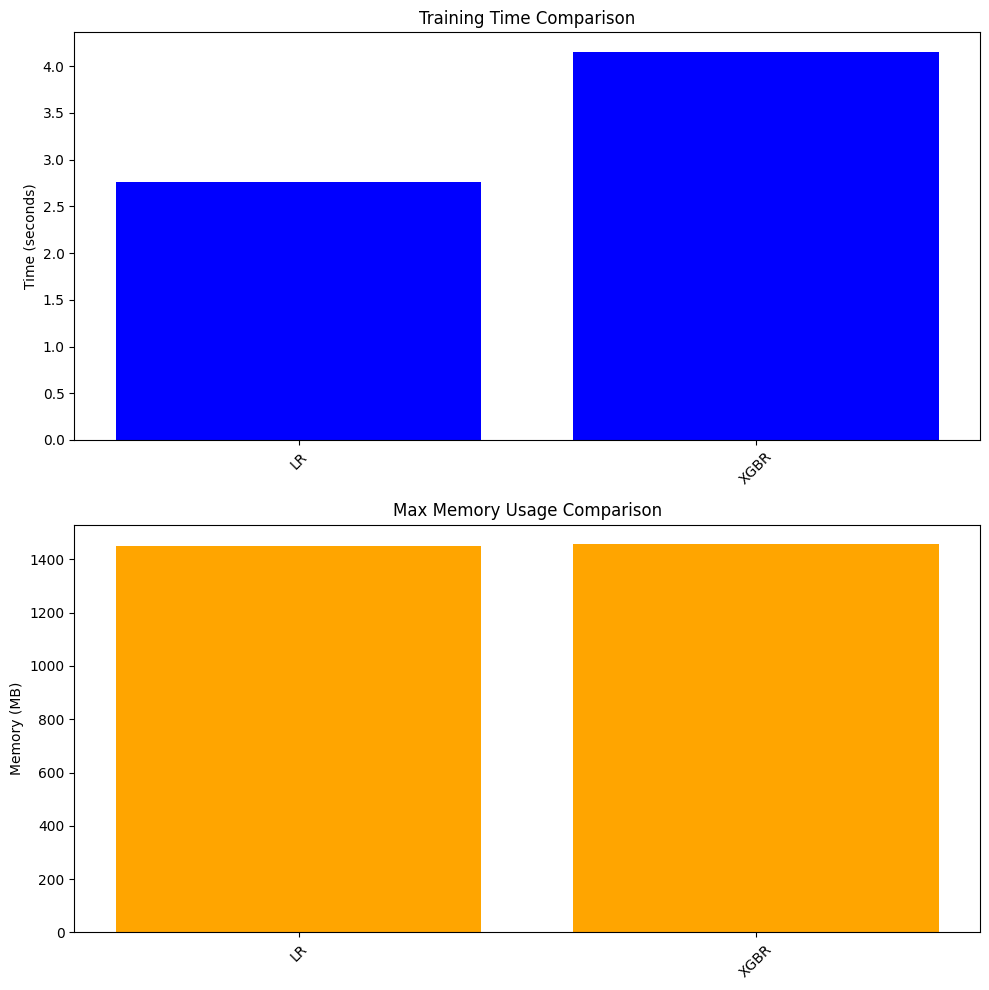

In [30]:
import matplotlib.pyplot as plt

# 📊 시각화: 학습 시간 & 메모리 사용량 비교
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Train 결과에서 필요한 컬럼 추출
results_df = train_results_df_final[['Model', 'Train Time (s) Mean', 'Train Memory (MB) Mean']]

# 학습 시간 비교 그래프
axs[0].bar(results_df['Model'], results_df['Train Time (s) Mean'], color='blue')
axs[0].set_title('Training Time Comparison')
axs[0].set_ylabel('Time (seconds)')
axs[0].set_xticklabels(results_df['Model'], rotation=45)

# 메모리 사용량 비교 그래프
axs[1].bar(results_df['Model'], results_df['Train Memory (MB) Mean'], color='orange')
axs[1].set_title('Max Memory Usage Comparison')
axs[1].set_ylabel('Memory (MB)')
axs[1].set_xticklabels(results_df['Model'], rotation=45)

plt.tight_layout()
plt.show()

In [59]:
import matplotlib.pyplot as plt
val_mae_scores, val_r2_scores, val_rmse_scores
# 📌 모델별 성능 지표 리스트 생성
r2_list =[]
rmse_list = []
mae_list = []

In [60]:
rmse_list.append(val_rmse_scores)

In [61]:
r2_list.append(val_r2_scores)
mae_list.append(val_mae_scores)

In [62]:
print(r2_list)
print(rmse_list)
print(mae_list)

[[0.30573419855866824, 0.2983680017082677, 0.29990801186079774, 0.2955314145090837, 0.29345869111364764, 0.5236543067586603, 0.5134941088466978, 0.5193941385885257, 0.5281915935008435, 0.5221222170601487]]
[[19.703826567602935, 19.963303711580068, 20.22676099412744, 19.95000273297842, 20.061031992053614, 16.321076904875834, 16.62347337728157, 16.75881552679734, 16.32657099721002, 16.498441125078795]]
[[12.988136681573389, 13.097580109458631, 13.244863744385595, 13.084250319160732, 13.13152912248502, 9.178763469256173, 9.329661944727384, 9.459384777266173, 9.15612580655816, 9.33022277054818]]


ValueError: Dimensions of labels and X must be compatible

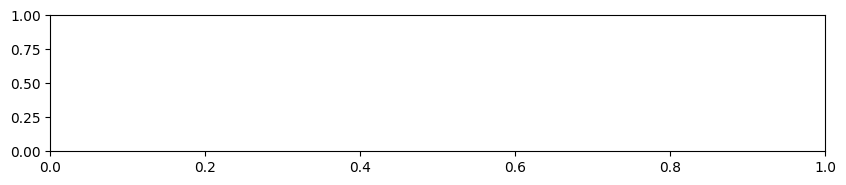

In [44]:
# 📌 박스플롯 시각화
plt.figure(figsize=(10, 6))

# R2 스코어 박스플롯
plt.subplot(3, 1, 1)
plt.boxplot(r2_list, labels=models.keys(), showfliers=False)
plt.title('Cross-Validation $R^2$ Score by Model')
plt.ylabel('$R^2$ Score')
plt.xlabel('Model')
plt.grid(True)

# RMSE 박스플롯
plt.subplot(3, 1, 2)
plt.boxplot(rmse_list, labels=models.keys(), showfliers=False)
plt.title('Model Comparison with Cross-Validation (RMSE)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE 박스플롯
plt.subplot(3, 1, 3)
plt.boxplot(mae_list, labels=models.keys(), showfliers=False)
plt.title('Model Comparison with Cross-Validation (MAE)')
plt.ylabel('MAE')
plt.grid(True)

# 박스플롯 저장
plt.tight_layout()
plt.savefig('boxplot_model_performance.tiff', format='tiff', dpi=300)
plt.show()

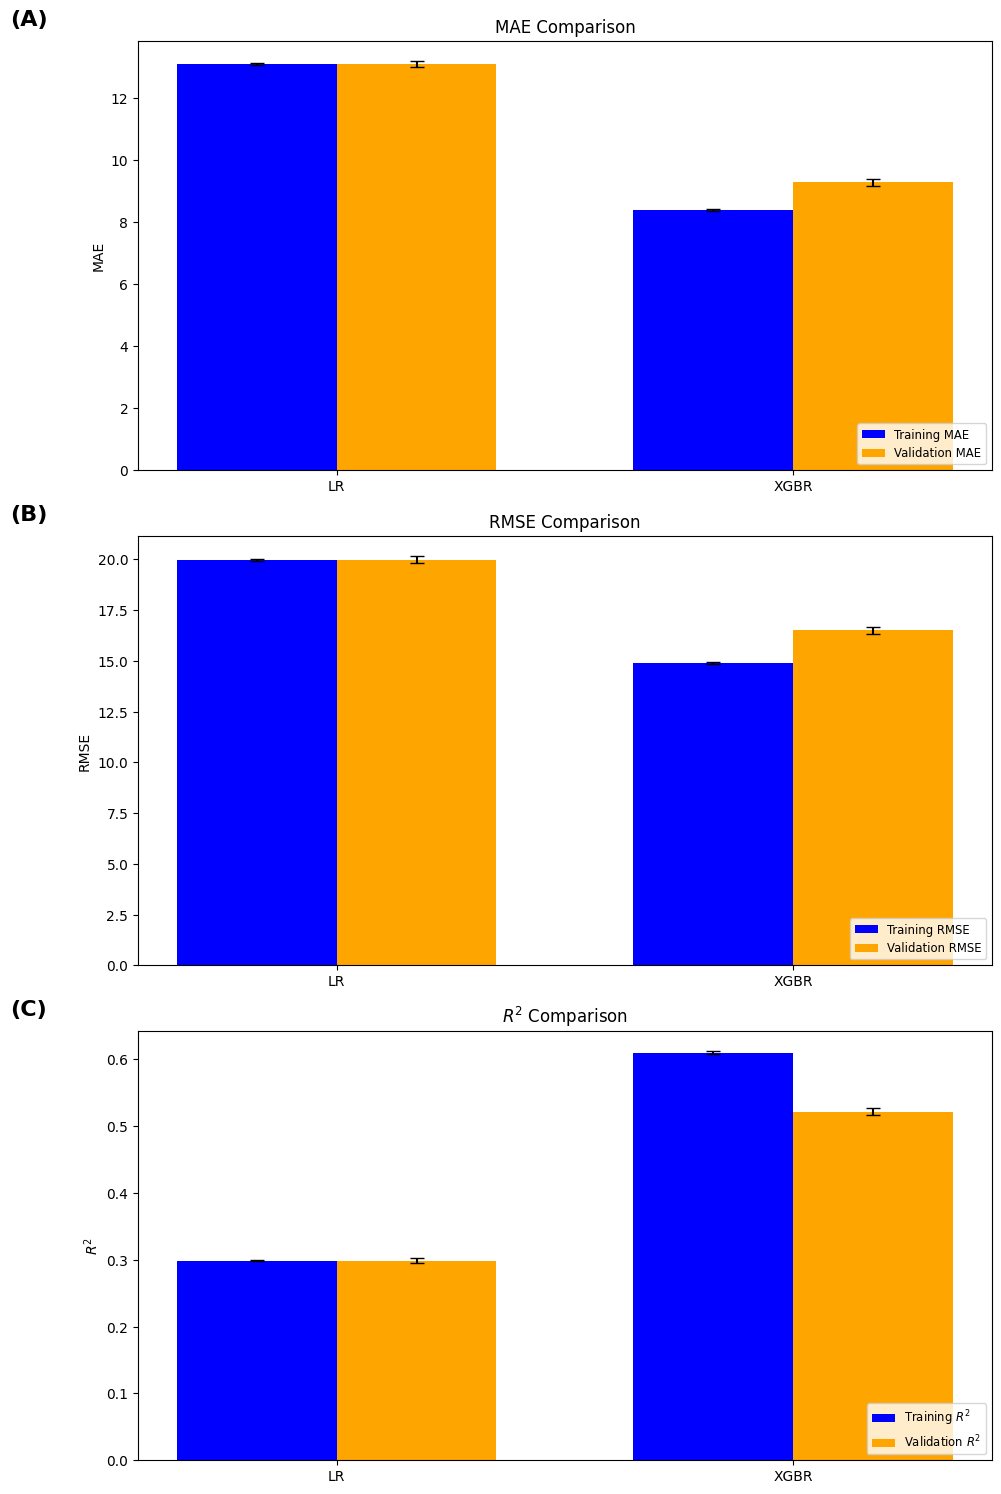

In [34]:
# 📌 막대 그래프 시각화
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
bar_width = 0.35
index = np.arange(len(validation_results_df_final['Model']))

# 각 그래프에 A, B, C 텍스트 추가 (제목 왼쪽 위치)
axs[0].text(-0.15, 1.05, '(A)', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[1].text(-0.15, 1.05, '(B)', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[2].text(-0.15, 1.05, '(C)', transform=axs[2].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')

# MAE 비교 (오류 막대 포함)
axs[0].bar(index - bar_width/2, train_results_df_final['MAE Mean'], bar_width, 
           yerr=train_results_df_final['MAE Std'], capsize=5, color='blue', label='Training MAE')
axs[0].bar(index + bar_width/2, validation_results_df_final['MAE Mean'], bar_width, 
           yerr=validation_results_df_final['MAE Std'], capsize=5, color='orange', label='Validation MAE')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(validation_results_df_final['Model'])
axs[0].legend(loc='lower right', fontsize='small')

# RMSE 비교 (오류 막대 포함)
axs[1].bar(index - bar_width/2, train_results_df_final['RMSE Mean'], bar_width, 
           yerr=train_results_df_final['RMSE Std'], capsize=5, color='blue', label='Training RMSE')
axs[1].bar(index + bar_width/2, validation_results_df_final['RMSE Mean'], bar_width, 
           yerr=validation_results_df_final['RMSE Std'], capsize=5, color='orange', label='Validation RMSE')
axs[1].set_title('RMSE Comparison')
axs[1].set_ylabel('RMSE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(validation_results_df_final['Model'])
axs[1].legend(loc='lower right', fontsize='small')

# R² 비교 (오류 막대 포함)
axs[2].bar(index - bar_width/2, train_results_df_final['R2 Mean'], bar_width, 
           yerr=train_results_df_final['R2 Std'], capsize=5, color='blue', label='Training $R^2$')
axs[2].bar(index + bar_width/2, validation_results_df_final['R2 Mean'], bar_width, 
           yerr=validation_results_df_final['R2 Std'], capsize=5, color='orange', label='Validation $R^2$')
axs[2].set_title('$R^2$ Comparison')
axs[2].set_ylabel('$R^2$')
axs[2].set_xticks(index)
axs[2].set_xticklabels(validation_results_df_final['Model'])
axs[2].legend(loc='lower right', fontsize='small')

plt.tight_layout()
# TIFF 형식으로 그래프 저장 (해상도 300dpi)
plt.savefig('barplot_model_performance.tiff', format='tiff', dpi=300)
plt.show()

--------------

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

# 성능 평가를 위한 리스트 초기화
results = []
rmse_list = []

# KFold 객체 생성 (5-fold, random_state 지정)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 모델에 대해 성능 평가
for model_name, model in models.items():
    # 5-fold 교차검증을 통한 RMSE, MSE, R2 계산
    rmse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_root_mean_squared_error')
    mse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
    
    # 평균 및 표준편차 계산
    rmse_mean = -rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    # 결과 저장
    results.append({
        'Model': model_name,
        'RMSE Mean': rmse_mean,
        'RMSE Std': rmse_std,
        'MSE Mean': -mse_scores.mean(),
        'R2 Mean': r2_scores.mean()
    })
    
    # RMSE 리스트 저장 (박스플롯 시각화를 위해)
    rmse_list.append(-rmse_scores)

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

,Model,RMSE Mean,RMSE Std,MSE Mean,R2 Mean
0,LR,19.980985,0.170237,399.268750,0.298600
1,RFR,16.861082,0.148846,284.088880,0.500433
2,XGBR,16.505676,0.169802,272.466159,0.521371
3,LGBR,16.648384,0.138260,277.187800,0.513057
4,CBR,16.588995,0.144904,275.215746,0.516527
5,GBR,17.004920,0.152389,289.191242,0.491984


In [ ]:
# 폰트 크기 설정
plt.rc('font', size=20)         # 기본 폰트 크기
plt.rc('axes', titlesize=20)     # 제목 폰트 크기
plt.rc('axes', labelsize=20)     # 축 제목 폰트 크기
plt.rc('xtick', labelsize=20)    # x축 값 폰트 크기
plt.rc('ytick', labelsize=20)    # y축 값 폰트 크기
plt.rc('legend', fontsize=20)    # 범례 폰트 크기
plt.rc('figure', titlesize=20)   # Figure 제목 폰트 크기

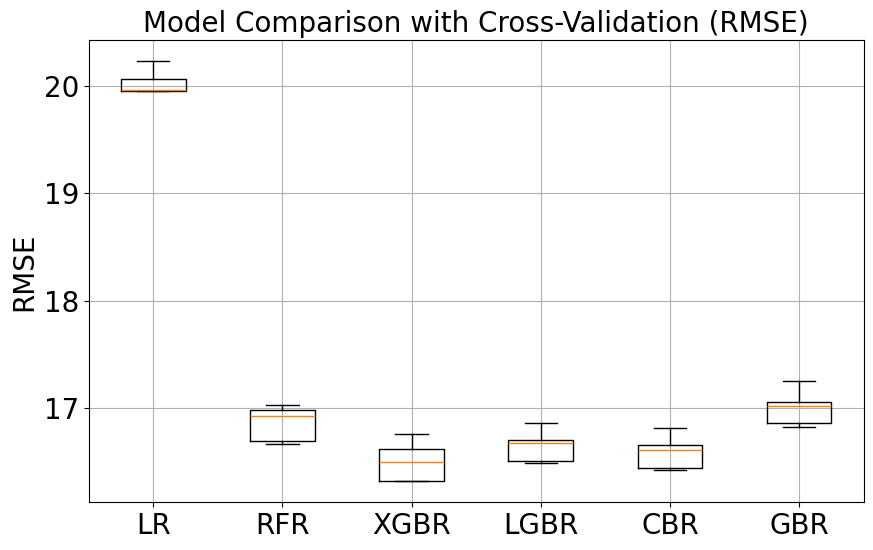

In [ ]:
# 박스플롯을 사용한 RMSE 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(rmse_list, labels=models.keys(), showfliers=False)
plt.title('Model Comparison with Cross-Validation (RMSE)')
plt.ylabel('RMSE')
plt.xticks()
plt.grid(True)
plt.savefig('model_performance_comparison_rmse_ver2.tiff', format='tiff', dpi=300)
plt.show()

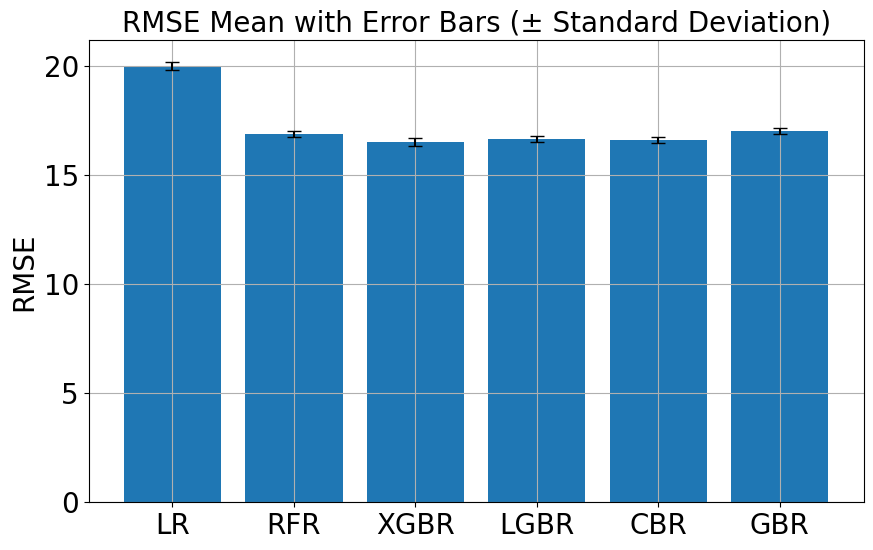

In [ ]:
# 막대 그래프를 사용한 RMSE 평균 및 표준편차 시각화
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE Mean'], yerr=results_df['RMSE Std'], capsize=5)
plt.title('RMSE Mean with Error Bars (± Standard Deviation)')
plt.ylabel('RMSE')
plt.xticks()
plt.grid(True)
plt.show()

In [ ]:
# 성능 평가를 위한 리스트 초기화
results = []
mae_list = []

# 각 모델에 대해 성능 평가
for model_name, model in models.items():
    # 5-fold 교차검증을 통한 MAE 계산
    mae_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_error')
    
    # 평균 및 표준편차 계산
    mae_mean = -mae_scores.mean()
    mae_std = mae_scores.std()
    
    # 결과 저장
    results.append({
        'Model': model_name,
        'MAE Mean': mae_mean,
        'MAE Std': mae_std
    })
    
    # MAE 리스트 저장 (박스플롯 시각화를 위해)
    mae_list.append(-mae_scores)

# 결과 데이터프레임 생성
results_df_mae = pd.DataFrame(results)

# 성능 평가 결과 출력
results_df_mae

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

,Model,MAE Mean,MAE Std
0,LR,13.109272,0.082846
1,RFR,9.148836,0.100205
2,XGBR,9.290832,0.111512
3,LGBR,9.254608,0.090717
4,CBR,9.345532,0.097120
5,GBR,9.721723,0.106728


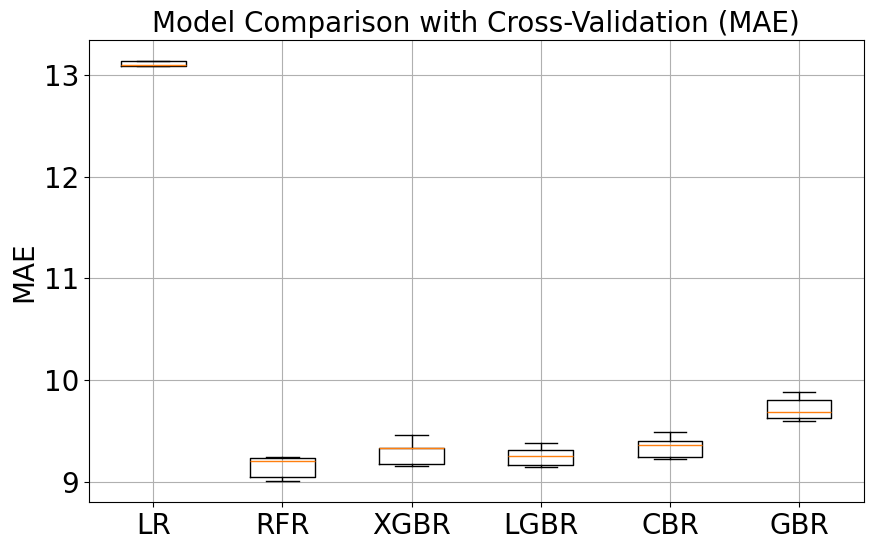

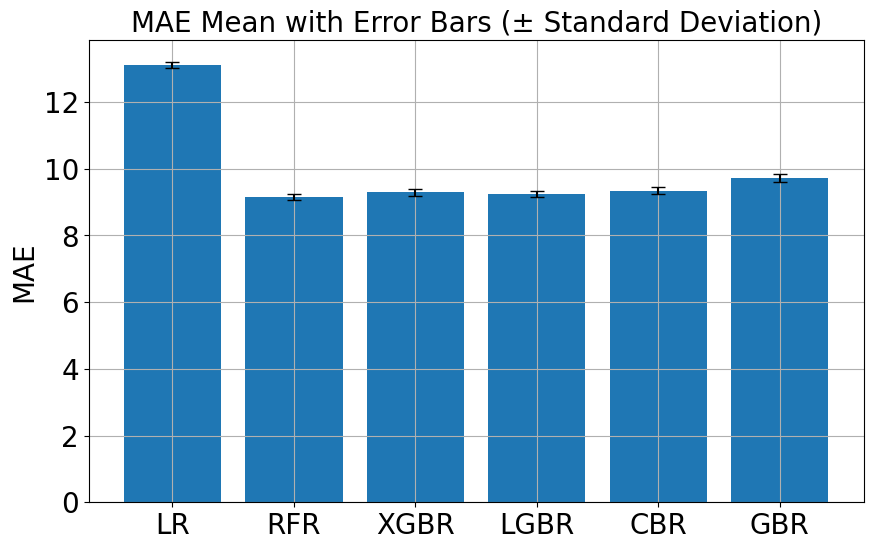

In [ ]:
# 박스플롯을 사용한 MAE 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(mae_list, labels=models.keys(), showfliers=False)
plt.title('Model Comparison with Cross-Validation (MAE)')
plt.ylabel('MAE')
plt.xticks()
plt.grid(True)
plt.savefig('model_performance_comparison_mae_ver2.tiff', format='tiff', dpi=300)
plt.show()

# 막대 그래프를 사용한 MAE 평균 및 표준편차 시각화
plt.figure(figsize=(10, 6))
plt.bar(results_df_mae['Model'], results_df_mae['MAE Mean'], yerr=results_df_mae['MAE Std'], capsize=5)
plt.title('MAE Mean with Error Bars (± Standard Deviation)')
plt.ylabel('MAE')
plt.xticks()
plt.grid(True)
plt.show()

In [ ]:
results_df

,Model,RMSE Mean,RMSE Std,MSE Mean,R2 Mean
0,LR,19.980985,0.170237,399.268750,0.298600
1,RFR,16.861082,0.148846,284.088880,0.500433
2,XGBR,16.505676,0.169802,272.466159,0.521371
3,LGBR,16.648384,0.138260,277.187800,0.513057
4,CBR,16.588995,0.144904,275.215746,0.516527
5,GBR,17.004920,0.152389,289.191242,0.491984


In [ ]:
results_df_mae

,Model,MAE Mean,MAE Std
0,LR,13.109272,0.082846
1,RFR,9.148836,0.100205
2,XGBR,9.290832,0.111512
3,LGBR,9.254608,0.090717
4,CBR,9.345532,0.097120
5,GBR,9.721723,0.106728


In [ ]:
cv_results_df_r2

,Model,R2 Score
0,LR,0.305734
1,LR,0.298368
2,LR,0.299908
3,LR,0.295531
4,LR,0.293459
5,RFR,0.503253
6,RFR,0.494088
7,RFR,0.504423
8,RFR,0.506216
9,RFR,0.494327


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 9

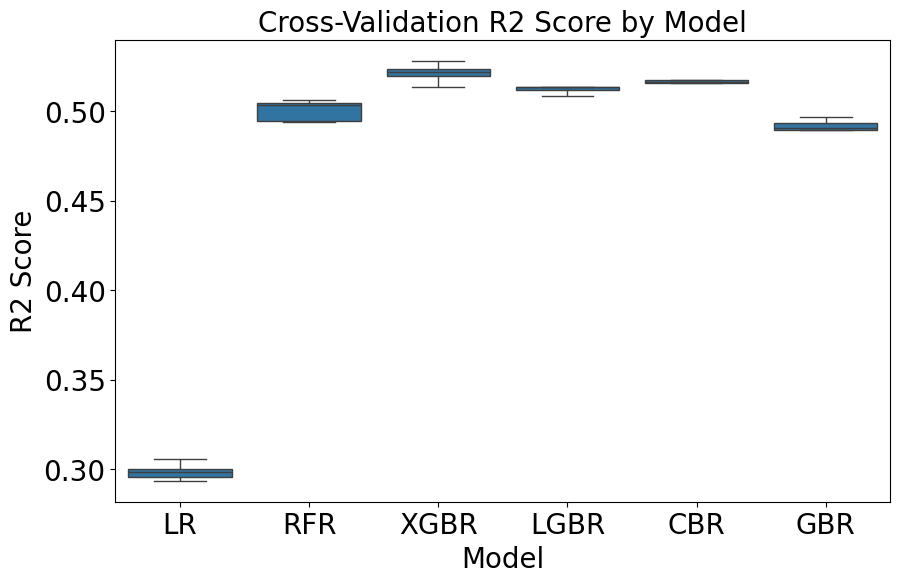

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 모델 성능 결과 저장 리스트 (교차 검증 R2)
cv_results = []

# 각 모델에 대해 교차 검증 수행 및 R2 스코어 수집
for model_name, model in models.items():
    # 교차 검증을 통한 R2 스코어 계산 (5-fold cross-validation)
    r2_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
    
    # 모델별로 R2 스코어 저장
    for score in r2_scores:
        cv_results.append({
            'Model': model_name,
            'R2 Score': score
        })

# 결과를 데이터프레임으로 변환
cv_results_df_r2 = pd.DataFrame(cv_results)

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R2 Score', data=cv_results_df_r2,  showfliers=False)
plt.title('Cross-Validation R2 Score by Model')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks()
plt.show()

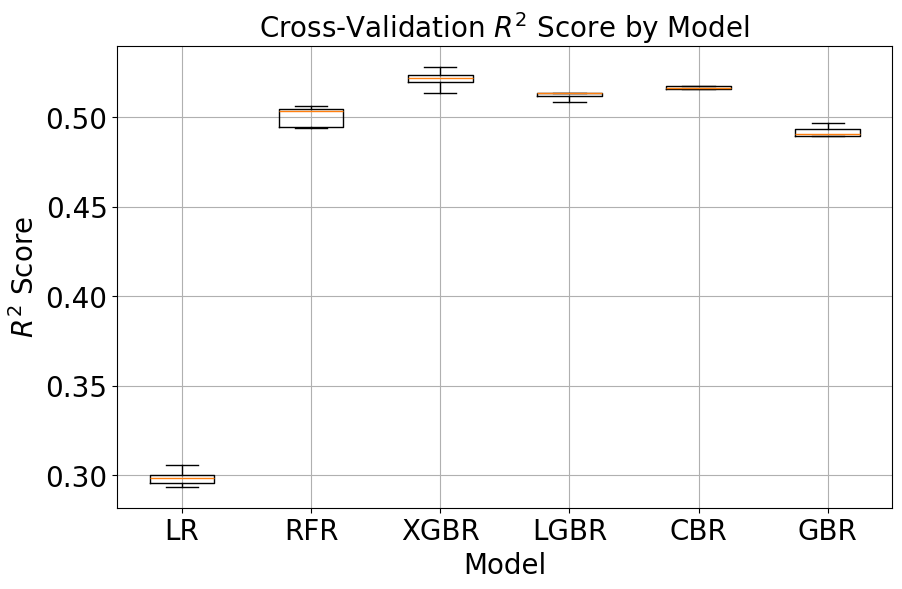

In [ ]:
import matplotlib.pyplot as plt

# 모델별로 R2 스코어 리스트 생성
model_names = cv_results_df_r2['Model'].unique()
r2_scores_by_model = [cv_results_df_r2[cv_results_df_r2['Model'] == model]['R2 Score'].values for model in model_names]

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(r2_scores_by_model, labels=model_names, showfliers=False)  # 이상치 표시 안 함
plt.title('Cross-Validation $R^2$ Score by Model')
plt.ylabel('$R^2$ Score')
plt.xlabel('Model')
plt.xticks()
plt.grid(True)
plt.savefig('model_performance_comparison_r2_ver2.tiff', format='tiff', dpi=300)
plt.show()

원본으로 CV

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 결과를 저장할 리스트 초기화
train_results = []
validation_results = []

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    # 각 fold에서의 train과 validation 성능 저장 리스트 초기화
    train_mae_scores = []
    train_rmse_scores = []
    train_r2_scores = []
    
    val_mae_scores = []
    val_rmse_scores = []
    val_r2_scores = []
    
    # 교차 검증 시작
    for train_index, val_index in kf.split(X):
        # train과 validation 데이터 분리 (iloc 사용)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # 모델 학습
        model.fit(X_train, Y_train)
        
        # train 데이터에 대한 예측 및 성능 측정
        y_train_pred = model.predict(X_train)
        train_mae_scores.append(mean_absolute_error(Y_train, y_train_pred))
        train_rmse_scores.append(mean_squared_error(Y_train, y_train_pred, squared=False))
        train_r2_scores.append(r2_score(Y_train, y_train_pred))
        
        # validation 데이터에 대한 예측 및 성능 측정
        y_val_pred = model.predict(X_val)
        val_mae_scores.append(mean_absolute_error(Y_val, y_val_pred))
        val_rmse_scores.append(mean_squared_error(Y_val, y_val_pred, squared=False))
        val_r2_scores.append(r2_score(Y_val, y_val_pred))
    
    # train 성능의 평균 및 표준편차 계산
    train_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(train_mae_scores),
        'MAE Std': np.std(train_mae_scores),
        'RMSE Mean': np.mean(train_rmse_scores),
        'RMSE Std': np.std(train_rmse_scores),
        'R2 Mean': np.mean(train_r2_scores),
        'R2 Std': np.std(train_r2_scores)
    })
    
    # validation 성능의 평균 및 표준편차 계산
    validation_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(val_mae_scores),
        'MAE Std': np.std(val_mae_scores),
        'RMSE Mean': np.mean(val_rmse_scores),
        'RMSE Std': np.std(val_rmse_scores),
        'R2 Mean': np.mean(val_r2_scores),
        'R2 Std': np.std(val_r2_scores)
    })

# 결과를 데이터프레임으로 변환
train_results_df = pd.DataFrame(train_results)
validation_results_df = pd.DataFrame(validation_results)

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.643056


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.737551


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.660360


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

In [ ]:
train_results_df

,Model,MAE Mean,MAE Std,RMSE Mean,RMSE Std,R2 Mean,R2 Std
0,LR,13.108370,0.034358,19.980176,0.042508,0.298717,0.001038
1,RFR,3.383906,0.009221,6.306340,0.013312,0.930136,0.000204
2,XGBR,8.388331,0.035646,14.911413,0.060201,0.609399,0.002030
3,LGBR,8.997494,0.032065,16.174003,0.043653,0.540453,0.001123
4,CBR,8.857466,0.029574,15.702500,0.043773,0.566856,0.001149
5,GBR,9.678013,0.026053,16.927874,0.031553,0.496615,0.000272


In [ ]:
validation_results_df

,Model,MAE Mean,MAE Std,RMSE Mean,RMSE Std,R2 Mean,R2 Std
0,LR,13.109272,0.082846,19.980985,0.170237,0.298600,0.004207
1,RFR,9.145416,0.108053,16.867406,0.147363,0.500147,0.005182
2,XGBR,9.290832,0.111512,16.505676,0.169802,0.521371,0.004863
3,LGBR,9.254608,0.090717,16.648384,0.138260,0.513057,0.002955
4,CBR,9.345532,0.097120,16.588995,0.144904,0.516527,0.003244
5,GBR,9.721733,0.106762,17.004937,0.152379,0.491984,0.002766


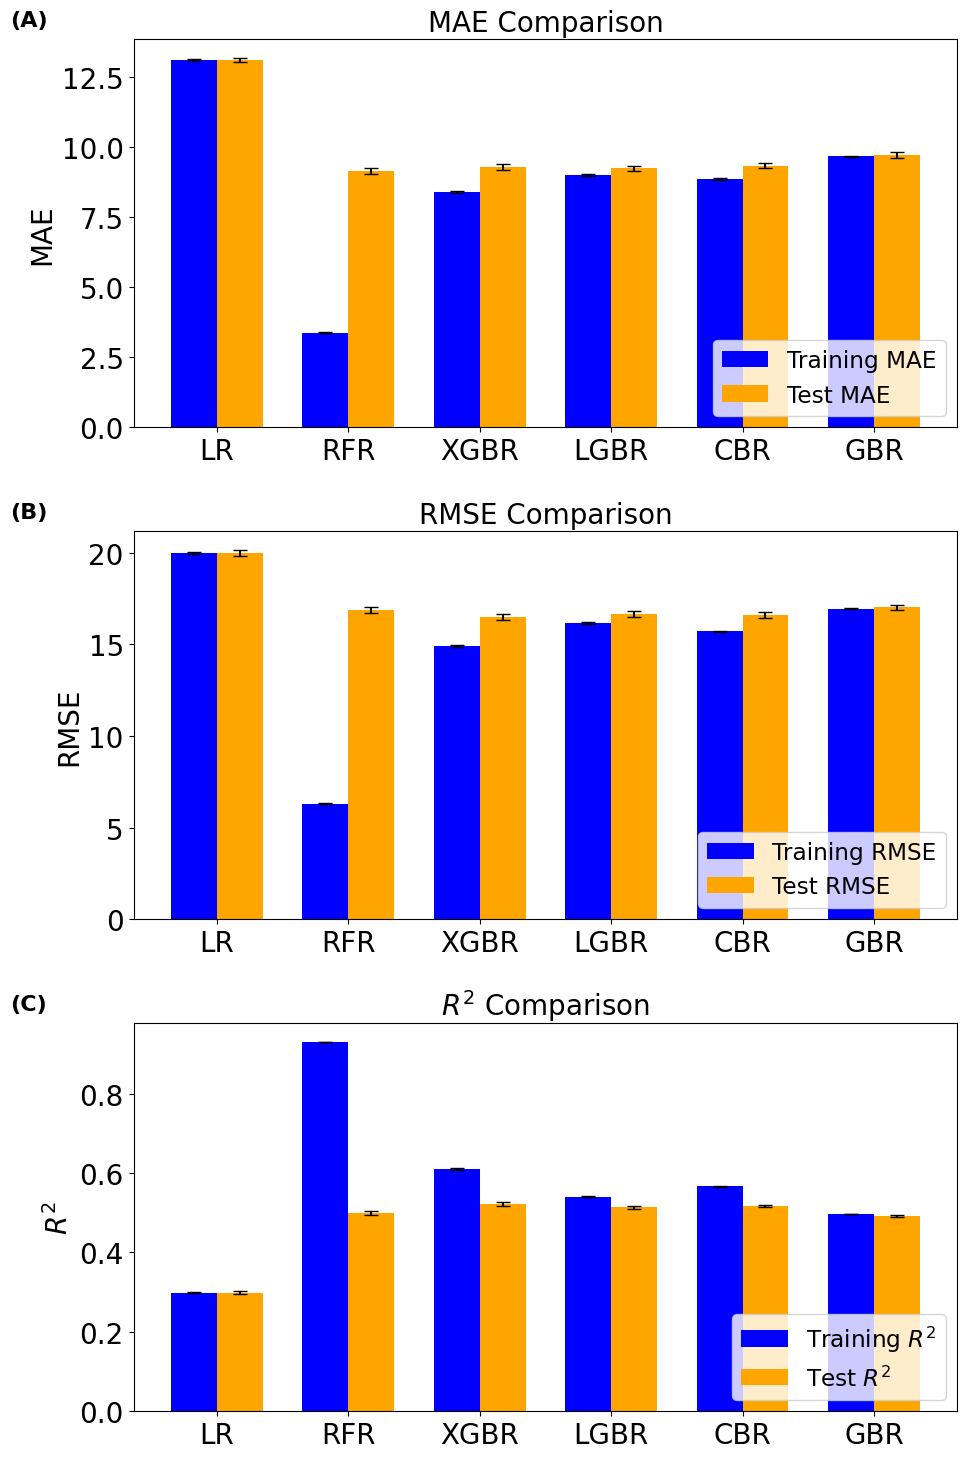

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 막대 그래프 설정
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
bar_width = 0.35
index = np.arange(len(train_results_df['Model']))

# 각 그래프에 A, B, C 텍스트 추가 (제목 왼쪽 위치)
axs[0].text(-0.15, 1.05, '(A)', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[1].text(-0.15, 1.05, '(B)', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[2].text(-0.15, 1.05, '(C)', transform=axs[2].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')

# MAE 비교 (오류 막대 포함)
axs[0].bar(index - bar_width/2, train_results_df['MAE Mean'], bar_width, 
           yerr=train_results_df['MAE Std'], capsize=5, color='blue', label='Training MAE')
axs[0].bar(index + bar_width/2, validation_results_df['MAE Mean'], bar_width, 
           yerr=validation_results_df['MAE Std'], capsize=5, color='orange', label='Test MAE')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(train_results_df['Model'])
axs[0].legend(loc='lower right', fontsize='small')

# RMSE 비교 (오류 막대 포함)
axs[1].bar(index - bar_width/2, train_results_df['RMSE Mean'], bar_width, 
           yerr=train_results_df['RMSE Std'], capsize=5, color='blue', label='Training RMSE')
axs[1].bar(index + bar_width/2, validation_results_df['RMSE Mean'], bar_width, 
           yerr=validation_results_df['RMSE Std'], capsize=5, color='orange', label='Test RMSE')
axs[1].set_title('RMSE Comparison')
axs[1].set_ylabel('RMSE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(train_results_df['Model'])
axs[1].legend(loc='lower right', fontsize='small')

# R² 비교 (오류 막대 포함)
axs[2].bar(index - bar_width/2, train_results_df['R2 Mean'], bar_width, 
           yerr=train_results_df['R2 Std'], capsize=5, color='blue', label='Training $R^2$')
axs[2].bar(index + bar_width/2, validation_results_df['R2 Mean'], bar_width, 
           yerr=validation_results_df['R2 Std'], capsize=5, color='orange', label='Test $R^2$')
axs[2].set_title('$R^2$ Comparison')
axs[2].set_ylabel('$R^2$')
axs[2].set_xticks(index)
axs[2].set_xticklabels(train_results_df['Model'])
axs[2].legend(loc='lower right', fontsize='small')

plt.tight_layout()
# TIFF 형식으로 그래프 저장 (해상도 300dpi)
plt.savefig('model_performance_comparison_ver2.tiff', format='tiff', dpi=300)
plt.show()

### 4. 하이퍼 파라미터 튜닝

##### 1) Genetic Algorithm

- XGBoost Regressor

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from deap import base, creator, tools, algorithms

# 평가 함수 (Fitness function)
def eval_function(individual):
    params = {
        'n_estimators': max(1, int(individual[0])),        # n_estimators must be at least 1
        'max_depth': max(1, int(individual[1])),           # max_depth must be at least 1
        'learning_rate': max(0.01, min(individual[2], 0.3)),  # learning_rate between 0.01 and 0.3
        'subsample': max(0.1, min(individual[3], 1.0)),    # subsample between 0.1 and 1.0
        'colsample_bytree': max(0.1, min(individual[4], 1.0)),  # colsample_bytree between 0.1 and 1.0
        'min_child_weight': max(1, individual[5]),         # min_child_weight must be at least 1
        'gamma': max(0, individual[6])                     # gamma must be non-negative
    }
    
    # 교차 검증
    model = xgb.XGBRegressor(**params)
    cv_score = -cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error').mean()
    
    return cv_score,

# GA 환경 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # 최소화 문제
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_n_estimators", np.random.randint, 10, 200)  # n_estimators
toolbox.register("attr_max_depth", np.random.randint, 3, 15)  # max_depth
toolbox.register("attr_learning_rate", np.random.uniform, 0.01, 0.3)  # learning_rate
toolbox.register("attr_subsample", np.random.uniform, 0.1, 1.0)  # subsample
toolbox.register("attr_colsample_bytree", np.random.uniform, 0.1, 1.0)  # colsample_bytree
toolbox.register("attr_min_child_weight", np.random.uniform, 1, 10)  # min_child_weight
toolbox.register("attr_gamma", np.random.uniform, 0, 10)  # gamma

# 파라미터 범위 설정
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_learning_rate,
                  toolbox.attr_subsample, toolbox.attr_colsample_bytree, toolbox.attr_min_child_weight,
                  toolbox.attr_gamma), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_function)

# GA 실행
n_generations = 10
population = toolbox.population(n=50)
cxpb = 0.5  # 교차 확률
mutpb = 0.2  # 돌연변이 확률

# GA 반복문
for gen in range(n_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
    fits = list(map(toolbox.evaluate, offspring))
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    # 다음 세대를 위한 선택
    population[:] = toolbox.select(population + offspring, len(population))

# 최적의 하이퍼파라미터 출력
best_individual_xg = tools.selBest(population, 1)[0]
print(f'Best parameters: {best_individual_xg}')
#Best parameters: [221.3455485581372, 11.746940097957388, 0.05887752201858312, 1.6042198699179555, 0.7179614591770246, 5.850948529954245, 5.963553668666209]

In [ ]:
# 최적의 하이퍼파라미터 추출
best_params = {
    'n_estimators': max(1, int(best_individual_xg[0])),        # n_estimators must be at least 1
    'max_depth': max(1, int(best_individual_xg[1])),           # max_depth must be at least 1
    'learning_rate': max(0.01, min(best_individual_xg[2], 0.3)),  # learning_rate between 0.01 and 0.3
    'subsample': max(0.1, min(best_individual_xg[3], 1.0)),    # subsample between 0.1 and 1.0
    'colsample_bytree': max(0.1, min(best_individual_xg[4], 1.0)),  # colsample_bytree between 0.1 and 1.0
    'min_child_weight': max(1, best_individual_xg[5]),         # min_child_weight must be at least 1
    'gamma': max(0, best_individual_xg[6])                     # gamma must be non-negative
}

# 최적 하이퍼파라미터로 모델 생성
best_model = xgb.XGBRegressor(**best_params)

##### 2) After Tuning

In [42]:
# XGBoost 모델 로드
best_xgbr_model = xgb.XGBRegressor()
best_xgbr_model.load_model('bestXGBR_model.txt')

# 모델 리스트 생성
models = {
    "best_XGBR": best_xgbr_model,
    "Stacking": StackingRegressor(estimators=base_models, final_estimator=meta_model)
}

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# KFold 객체 생성 (5-fold, random_state 지정)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트 초기화
train_results = []
validation_results = []

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    # 각 fold에서의 train과 validation 성능 저장 리스트 초기화
    train_mae_scores = []
    train_rmse_scores = []
    train_r2_scores = []
    
    val_mae_scores = []
    val_rmse_scores = []
    val_r2_scores = []
    
    # 교차 검증 시작
    for train_index, val_index in kf.split(X):
        # train과 validation 데이터 분리 (iloc 사용)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # 모델 학습
        model.fit(X_train, Y_train)
        
        # train 데이터에 대한 예측 및 성능 측정
        y_train_pred = model.predict(X_train)
        train_mae_scores.append(mean_absolute_error(Y_train, y_train_pred))
        train_rmse_scores.append(mean_squared_error(Y_train, y_train_pred, squared=False))
        train_r2_scores.append(r2_score(Y_train, y_train_pred))
        
        # validation 데이터에 대한 예측 및 성능 측정
        y_val_pred = model.predict(X_val)
        val_mae_scores.append(mean_absolute_error(Y_val, y_val_pred))
        val_rmse_scores.append(mean_squared_error(Y_val, y_val_pred, squared=False))
        val_r2_scores.append(r2_score(Y_val, y_val_pred))
    
    # train 성능의 평균 및 표준편차 계산
    train_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(train_mae_scores),
        'MAE Std': np.std(train_mae_scores),
        'RMSE Mean': np.mean(train_rmse_scores),
        'RMSE Std': np.std(train_rmse_scores),
        'R2 Mean': np.mean(train_r2_scores),
        'R2 Std': np.std(train_r2_scores)
    })
    
    # validation 성능의 평균 및 표준편차 계산
    validation_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(val_mae_scores),
        'MAE Std': np.std(val_mae_scores),
        'RMSE Mean': np.mean(val_rmse_scores),
        'RMSE Std': np.std(val_rmse_scores),
        'R2 Mean': np.mean(val_r2_scores),
        'R2 Std': np.std(val_r2_scores)
    })

# 결과를 데이터프레임으로 변환
train_results_df_final = pd.DataFrame(train_results)
validation_results_df_final = pd.DataFrame(validation_results)

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.748280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.737304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.643056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.672994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.737551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.738117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.660360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.674294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
train_results_df_final

,Model,MAE Mean,MAE Std,RMSE Mean,RMSE Std,R2 Mean,R2 Std
0,best_XGBR,7.438276,0.034966,13.241111,0.052761,0.692000,0.002363
1,Stacking,6.633408,0.092530,12.445303,0.247511,0.727831,0.010172


In [45]:
validation_results_df_final

,Model,MAE Mean,MAE Std,RMSE Mean,RMSE Std,R2 Mean,R2 Std
0,best_XGBR,9.178662,0.100827,16.255956,0.158635,0.535749,0.003658
1,Stacking,8.956229,0.106062,16.357978,0.170125,0.529901,0.004711


In [ ]:
import joblib

# 모델을 .pkl 파일로 저장
joblib.dump(best_model, 'bestXGBR_model.pkl')
Stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model)
joblib.dump(Stacking, 'Stacking.pkl')

['Stacking.pkl']

In [ ]:
for train_index, val_index in kf.split(X):
        # train과 validation 데이터 분리 (iloc 사용)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # 모델 학습
        best_model.fit(X_train, Y_train)

In [ ]:
joblib.dump(best_model, 'bestXGBR_model.pkl')

['bestXGBR_model.pkl']

In [ ]:
best_model.save_model('bestXGBR_model.txt')

In [ ]:
for train_index, val_index in kf.split(X):
        # train과 validation 데이터 분리 (iloc 사용)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # 모델 학습
        Stacking.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.748280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

In [ ]:
Stacking.save_model('Stacking.txt')

In [ ]:
# 저장된 모델을 로드하는 방법
# loaded_model = lgb.Booster(model_file='final_model.txt')

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결과를 저장할 리스트 초기화
train_results = []
validation_results = []

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    # 각 fold에서의 train과 validation 성능 저장 리스트 초기화
    train_mae_scores = []
    train_rmse_scores = []
    train_r2_scores = []
    
    val_mae_scores = []
    val_rmse_scores = []
    val_r2_scores = []
    
    # 교차 검증 시작
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        # train과 validation 데이터 분리 (iloc 사용)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # 모델 학습
        model.fit(X_train, Y_train)
        
        # train 데이터에 대한 예측 및 성능 측정
        y_train_pred = model.predict(X_train)
        train_mae_scores.append(mean_absolute_error(Y_train, y_train_pred))
        train_rmse_scores.append(mean_squared_error(Y_train, y_train_pred, squared=False))
        train_r2_scores.append(r2_score(Y_train, y_train_pred))
        
        # validation 데이터에 대한 예측 및 성능 측정
        y_val_pred = model.predict(X_val)
        val_mae_scores.append(mean_absolute_error(Y_val, y_val_pred))
        val_rmse_scores.append(mean_squared_error(Y_val, y_val_pred, squared=False))
        val_r2_scores.append(r2_score(Y_val, y_val_pred))
    
    # train 성능의 평균 및 표준편차 계산
    train_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(train_mae_scores),
        'MAE Std': np.std(train_mae_scores),
        'RMSE Mean': np.mean(train_rmse_scores),
        'RMSE Std': np.std(train_rmse_scores),
        'R2 Mean': np.mean(train_r2_scores),
        'R2 Std': np.std(train_r2_scores),
        'MAE Scores': train_mae_scores,
        'RMSE Scores': train_rmse_scores,
        'R2 Scores': train_r2_scores
    })
    
    # validation 성능의 평균 및 표준편차 계산
    validation_results.append({
        'Model': model_name,
        'MAE Mean': np.mean(val_mae_scores),
        'MAE Std': np.std(val_mae_scores),
        'RMSE Mean': np.mean(val_rmse_scores),
        'RMSE Std': np.std(val_rmse_scores),
        'R2 Mean': np.mean(val_r2_scores),
        'R2 Std': np.std(val_r2_scores),
        'MAE Scores': val_mae_scores,
        'RMSE Scores': val_rmse_scores,
        'R2 Scores': val_r2_scores
    })

# 결과를 데이터프레임으로 변환
train_results_df_final = pd.DataFrame(train_results)
validation_results_df_final = pd.DataFrame(validation_results)

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will b

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.727063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.748280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97121, number of used features: 7
[LightGBM] [Info] Start training from score 14.678666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77696, number of used features: 7
[LightGBM] [Info] Start training from score 14.737304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.643056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.672994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 7

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.737551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.738117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 97122, number of used features: 7
[LightGBM] [Info] Start training from score 14.660360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 77697, number of used features: 7
[LightGBM] [Info] Start training from score 14.674294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 7

c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


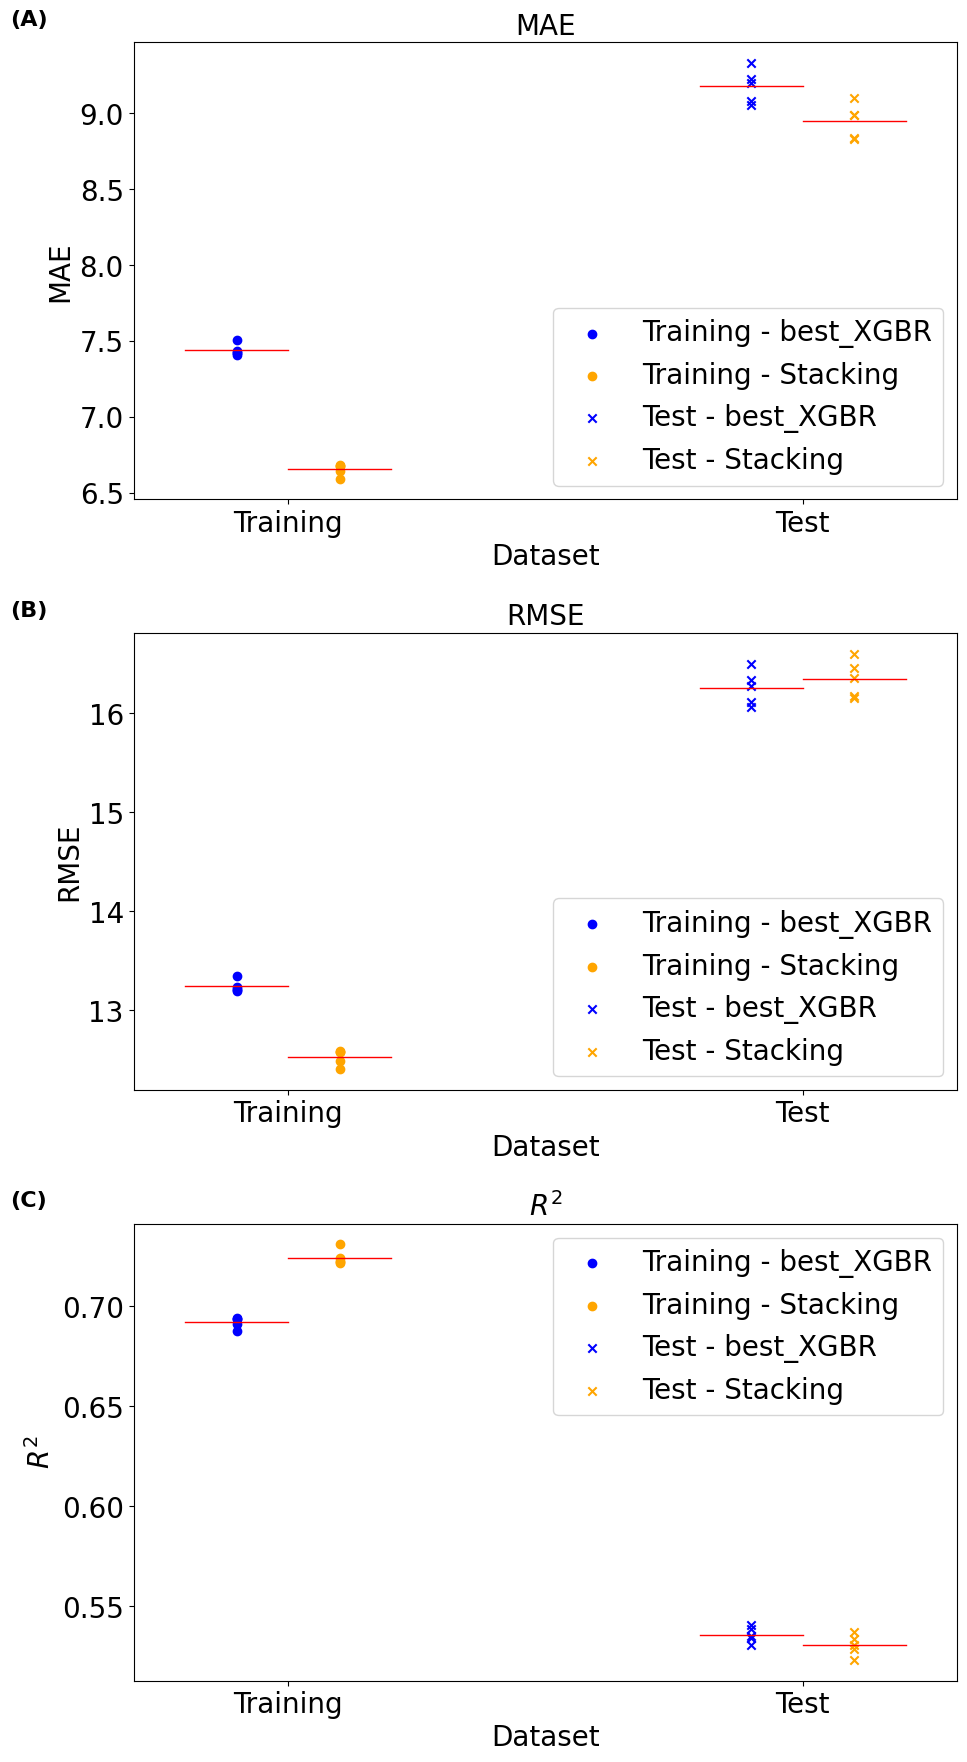

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# MAE, RMSE, R2 점수 리스트 추출
train_mae_scores_xgbr = train_results_df_final.loc[0, "MAE Scores"]
train_rmse_scores_xgbr = train_results_df_final.loc[0, "RMSE Scores"]
train_r2_scores_xgbr = train_results_df_final.loc[0, "R2 Scores"]

train_mae_scores_stacking = train_results_df_final.loc[1, "MAE Scores"]
train_rmse_scores_stacking = train_results_df_final.loc[1, "RMSE Scores"]
train_r2_scores_stacking = train_results_df_final.loc[1, "R2 Scores"]

val_mae_scores_xgbr = validation_results_df_final.loc[0, "MAE Scores"]
val_rmse_scores_xgbr = validation_results_df_final.loc[0, "RMSE Scores"]
val_r2_scores_xgbr = validation_results_df_final.loc[0, "R2 Scores"]

val_mae_scores_stacking = validation_results_df_final.loc[1, "MAE Scores"]
val_rmse_scores_stacking = validation_results_df_final.loc[1, "RMSE Scores"]
val_r2_scores_stacking = validation_results_df_final.loc[1, "R2 Scores"]

# 그래프 설정
metrics = ["MAE", "RMSE", "$R^2$"]
titles = ["MAE", "RMSE", "$R^2$"]
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 그래프 간격 조정
dot_width = 0.15  # 점 간격 설정

# 각 그래프에 A, B, C 텍스트 추가 (제목 왼쪽 위치)
axs[0].text(-0.15, 1.05, '(A)', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[1].text(-0.15, 1.05, '(B)', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')
axs[2].text(-0.15, 1.05, '(C)', transform=axs[2].transAxes, fontsize=16, fontweight='bold', va='center', ha='left')

# 각 지표별 그래프 생성
for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.set_xlabel("Dataset")
    ax.set_ylabel(metric)
    
    # Train과 Validation 결과의 x 좌표 설정 (오른쪽으로 이동)
    x_train_xgbr, x_train_stacking = [1.1] * 5, [1.3] * 5
    x_val_xgbr, x_val_stacking = [2.1] * 5, [2.3] * 5
    
    # 각 지표별 데이터 선택
    if metric == "MAE":
        train_scores_xgbr = train_mae_scores_xgbr
        train_scores_stacking = train_mae_scores_stacking
        val_scores_xgbr = val_mae_scores_xgbr
        val_scores_stacking = val_mae_scores_stacking
        mean_train_xgbr = np.mean(train_scores_xgbr)
        mean_train_stacking = np.mean(train_scores_stacking)
        mean_val_xgbr = np.mean(val_scores_xgbr)
        mean_val_stacking = np.mean(val_scores_stacking)
    elif metric == "RMSE":
        train_scores_xgbr = train_rmse_scores_xgbr
        train_scores_stacking = train_rmse_scores_stacking
        val_scores_xgbr = val_rmse_scores_xgbr
        val_scores_stacking = val_rmse_scores_stacking
        mean_train_xgbr = np.mean(train_scores_xgbr)
        mean_train_stacking = np.mean(train_scores_stacking)
        mean_val_xgbr = np.mean(val_scores_xgbr)
        mean_val_stacking = np.mean(val_scores_stacking)
    else:  # R2
        train_scores_xgbr = train_r2_scores_xgbr
        train_scores_stacking = train_r2_scores_stacking
        val_scores_xgbr = val_r2_scores_xgbr
        val_scores_stacking = val_r2_scores_stacking
        mean_train_xgbr = np.mean(train_scores_xgbr)
        mean_train_stacking = np.mean(train_scores_stacking)
        mean_val_xgbr = np.mean(val_scores_xgbr)
        mean_val_stacking = np.mean(val_scores_stacking)
    
    # Train 결과 점 그래프
    ax.scatter(x_train_xgbr, train_scores_xgbr, color="blue", label="Training - best_XGBR")
    ax.scatter(x_train_stacking, train_scores_stacking, color="orange", label="Training - Stacking")
    
    # Validation 결과 점 그래프
    ax.scatter(x_val_xgbr, val_scores_xgbr, color="blue", marker="x", label="Test - best_XGBR")
    ax.scatter(x_val_stacking, val_scores_stacking, color="orange", marker="x", label="Test - Stacking")
    
    # 평균값 빨간 실선 추가 (선 길이 및 굵기 수정)
    ax.plot([1.0, 1.2], [mean_train_xgbr, mean_train_xgbr], color="red", linewidth=1)  # Train XGBR 평균 실선
    ax.plot([1.2, 1.4], [mean_train_stacking, mean_train_stacking], color="red", linewidth=1)  # Train Stacking 평균 실선
    ax.plot([2.0, 2.2], [mean_val_xgbr, mean_val_xgbr], color="red", linewidth=1)  # Validation XGBR 평균 실선
    ax.plot([2.2, 2.4], [mean_val_stacking, mean_val_stacking], color="red", linewidth=1)  # Validation Stacking 평균 실선
    
    # X축 레이블과 틱 설정
    ax.set_xticks([1.2, 2.2])
    ax.set_xticklabels(["Training", "Test"])

    # 범례 설정 (mean 범례 추가)
    if metric == "$R^2$":
        ax.legend(loc="upper right", labels=["Training - best_XGBR", "Training - Stacking", "Test - best_XGBR", "Test - Stacking", "Mean"])
    else:
        ax.legend(loc="lower right", labels=["Training - best_XGBR", "Training - Stacking", "Test - best_XGBR", "Test - Stacking", "Mean"])

    # 선 길이 조정
    ax.set_xlim(0.9, 2.5)  # xlim을 설정하여 선 길이 조정 (여기서 범위를 조정하여 선의 길이를 바꿀 수 있습니다)

# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.savefig('model_performance_comparison_dotplot_ver3.tiff', format='tiff', dpi=300)
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

# 데이터프레임 예시 (실제 데이터프레임을 사용하세요)
# train_results_df_final과 validation_results_df_final이 이미 존재한다고 가정합니다.
# 예시 데이터프레임을 사용하여 값을 추출합니다.

# train_results_df_final에서 모델 별 성능 지표 추출
stacking_train_rmse = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'RMSE Scores'].values[0]
best_XGBR_train_rmse = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'RMSE Scores'].values[0]

stacking_train_mae = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'MAE Scores'].values[0]
best_XGBR_train_mae = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'MAE Scores'].values[0]

stacking_train_r2 = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'R2 Scores'].values[0]
best_XGBR_train_r2 = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'R2 Scores'].values[0]

# validation_results_df_final에서 모델 별 성능 지표 추출
stacking_val_rmse = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'RMSE Scores'].values[0]
best_XGBR_val_rmse = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'RMSE Scores'].values[0]

stacking_val_mae = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'MAE Scores'].values[0]
best_XGBR_val_mae = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'MAE Scores'].values[0]

stacking_val_r2 = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'R2 Scores'].values[0]
best_XGBR_val_r2 = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'R2 Scores'].values[0]

# t-test 수행 함수
def t_test(model1, model2, metric_name):
    t_stat, p_value = stats.ttest_ind(model1, model2)
    print(f"T-test 결과 ({metric_name}): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"{metric_name}에서 두 모델 간 차이는 유의미합니다.")
    else:
        print(f"{metric_name}에서 두 모델 간 차이는 유의미하지 않습니다.")

# Train 데이터에서의 t-test
t_test(stacking_train_rmse, best_XGBR_train_rmse, "Train RMSE")
t_test(stacking_train_mae, best_XGBR_train_mae, "Train MAE")
t_test(stacking_train_r2, best_XGBR_train_r2, "Train R²")

# Validation 데이터에서의 t-test
t_test(stacking_val_rmse, best_XGBR_val_rmse, "Validation RMSE")
t_test(stacking_val_mae, best_XGBR_val_mae, "Validation MAE")
t_test(stacking_val_r2, best_XGBR_val_r2, "Validation R²")

T-test 결과 (Train RMSE): t-statistic = -15.9611, p-value = 0.0000
Train RMSE에서 두 모델 간 차이는 유의미합니다.
T-test 결과 (Train MAE): t-statistic = -29.4506, p-value = 0.0000
Train MAE에서 두 모델 간 차이는 유의미합니다.
T-test 결과 (Train R²): t-statistic = 16.6829, p-value = 0.0000
Train R²에서 두 모델 간 차이는 유의미합니다.
T-test 결과 (Validation RMSE): t-statistic = 0.7509, p-value = 0.4742
Validation RMSE에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Validation MAE): t-statistic = -3.2014, p-value = 0.0126
Validation MAE에서 두 모델 간 차이는 유의미합니다.
T-test 결과 (Validation R²): t-statistic = -1.7223, p-value = 0.1233
Validation R²에서 두 모델 간 차이는 유의미하지 않습니다.


In [ ]:
# 데이터프레임 예시 (실제 데이터프레임을 사용하세요)
# train_results_df_final과 validation_results_df_final이 이미 존재한다고 가정합니다.

# train_results_df_final에서 모델 별 성능 지표 추출
stacking_train_rmse_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'RMSE Mean'].values[0]
best_XGBR_train_rmse_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'RMSE Mean'].values[0]

stacking_train_mae_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'MAE Mean'].values[0]
best_XGBR_train_mae_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'MAE Mean'].values[0]

stacking_train_r2_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'Stacking', 'R2 Mean'].values[0]
best_XGBR_train_r2_mean = train_results_df_final.loc[train_results_df_final['Model'] == 'best_XGBR', 'R2 Mean'].values[0]

# validation_results_df_final에서 모델 별 성능 지표 추출
stacking_val_rmse_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'RMSE Mean'].values[0]
best_XGBR_val_rmse_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'RMSE Mean'].values[0]

stacking_val_mae_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'MAE Mean'].values[0]
best_XGBR_val_mae_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'MAE Mean'].values[0]

stacking_val_r2_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'Stacking', 'R2 Mean'].values[0]
best_XGBR_val_r2_mean = validation_results_df_final.loc[validation_results_df_final['Model'] == 'best_XGBR', 'R2 Mean'].values[0]

# t-test 수행 함수
def t_test(mean_model1, mean_model2, metric_name):
    t_stat, p_value = stats.ttest_ind(mean_model1, mean_model2)
    print(f"T-test 결과 ({metric_name}): t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"{metric_name}에서 두 모델 간 차이는 유의미합니다.")
    else:
        print(f"{metric_name}에서 두 모델 간 차이는 유의미하지 않습니다.")

# Train 데이터에서의 t-test
t_test([stacking_train_rmse_mean], [best_XGBR_train_rmse_mean], "Train RMSE")
t_test([stacking_train_mae_mean], [best_XGBR_train_mae_mean], "Train MAE")
t_test([stacking_train_r2_mean], [best_XGBR_train_r2_mean], "Train R²")

# Validation 데이터에서의 t-test
t_test([stacking_val_rmse_mean], [best_XGBR_val_rmse_mean], "Validation RMSE")
t_test([stacking_val_mae_mean], [best_XGBR_val_mae_mean], "Validation MAE")
t_test([stacking_val_r2_mean], [best_XGBR_val_r2_mean], "Validation R²")


T-test 결과 (Train RMSE): t-statistic = nan, p-value = nan
Train RMSE에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Train MAE): t-statistic = nan, p-value = nan
Train MAE에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Train R²): t-statistic = nan, p-value = nan
Train R²에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Validation RMSE): t-statistic = nan, p-value = nan
Validation RMSE에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Validation MAE): t-statistic = nan, p-value = nan
Validation MAE에서 두 모델 간 차이는 유의미하지 않습니다.
T-test 결과 (Validation R²): t-statistic = nan, p-value = nan
Validation R²에서 두 모델 간 차이는 유의미하지 않습니다.


c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Choeminhwa\anaconda3\envs\alsghk\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [1]:
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  8 2023, 10:42:25) [MSC v.1916 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import sklearn
import shap
import xgboost
import matplotlib
import lightgbm
import catboost
import seaborn
import deap

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("sklearn version:", sklearn.__version__)
print("shap version:", shap.__version__)
print("xgboost version:", xgboost.__version__)
print("matplotlib version:", matplotlib.__version__)
print("lightgbm version:", lightgbm.__version__)
print("catboost version:", catboost.__version__)
print("seaborn version:", seaborn.__version__)
print("deap version:", deap.__version__)


pandas version: 2.1.4
numpy version: 1.23.2
sklearn version: 1.5.2
shap version: 0.46.0
xgboost version: 1.6.1
matplotlib version: 3.8.2
lightgbm version: 4.5.0
catboost version: 1.2.2
seaborn version: 0.13.0
deap version: 1.4


In [4]:
!jupyter notebook --version

7.0.6
